This code will take the MNIST dataset and train an SVM on the dataset so that  it can identify pictures of different numbers

[fetch_openml](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html)

In [2]:
#pg 85 hands on machine learning
#import mnist dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=True)
X, y = mnist["data"], mnist["target"]

print(type(y))



<class 'pandas.core.series.Series'>


Things you can send the pandas dataframe constructor
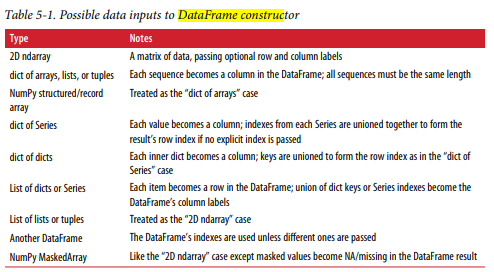

In [3]:
import pandas as pd
#print(mnist)

#print(type(mnist))

print(X)
print(y)

#X is dataframe and y is series
print(type(X))
print(type(y))

mnistdataframe = X
#pd.DataFrame(mnistlist)

#add a column of data (fancy word is "series") called "y answer" that has the data in y
mnistdataframe['y answer'] = y

#print(mnistdataframe)
#mnistdataframe #typing the name of the dataframe displays it in jupyter

#use contains() to select rows with the numbers we want
only2data = mnistdataframe[mnistdataframe['y answer'].str.contains('2')]

only6data = mnistdataframe[mnistdataframe['y answer'].str.contains('6')]

#pg 239 "python for data analysis"
#combine the only2data and only6data into a single dataset
only2and6 = pd.concat([only2data, only6data], axis=0)
#axis=0 means along the y axis (rows) i think

y_answers_only2and6 = only2and6['y answer']

X_only2and6 = only2and6.drop('y answer',axis=1) #axis=0 means along the x axis (columns) i think


print("X only 2 and 6")
print(X_only2and6)

###in future need to split into train and test

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

In [4]:
##split into train and test
#example code on pg 53
from sklearn.model_selection import train_test_split


type(X_only2and6,)
#done with 1 dataset
train_set, test_set = train_test_split(X_only2and6, test_size=.2)

#done with 2 datasets




In [5]:
########do not need to run this code every time. Just checking to see how many 2s and 6s are in the data.


#run this on the train and test data to make sure each has some 2s and some 6s
print("number of 2s and 6s")
print(only2and6['y answer'].value_counts())

number of 2s and 6s
2    6990
6    6876
9       0
8       0
7       0
5       0
4       0
3       0
1       0
0       0
Name: y answer, dtype: int64


In [6]:
#create and train the model with dataframa data only 2 and 6
#create the model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=12000)), #increased max iteration-lazy fix
])



###########Simpler version
#source:kaggle https://www.kaggle.com/code/nishan192/mnist-digit-recognition-using-svm/notebook
# linear model

##model_linear = SVC(kernel='linear')
###model_linear.fit(X_train, y_train)

##############3documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#train the model
svm_clf.fit(X_only2and6, y_answers_only2and6)

######Test for accuracy
from sklearn.metrics import accuracy_score
y_pred = svm_clf.predict(X_only2and6)


print("y_pred is")
#print(y_pred)
accuracy = accuracy_score(y_answers_only2and6, y_pred)

print("accuracy: "+str(accuracy))

y_pred is
accuracy: 0.9979806721476994


C:\Users\epicpython\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [7]:
import numpy as np
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
#pg 88    
print(y_train)


y_train_5 = (y_train == 5) #true for all 5s, false for all other digits
y_test_5 = (y_test == 5)



print(y_train_5)
for i in y_train_5:
    print(i)

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: uint8
0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool
True
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
Fal

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
True
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
True
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
Fal

False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
True
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
True
False
False
False
True


False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
True
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
True
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
True
False
False
True
False
False
False
False
Fal

False
False
True
False
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
True
False
False
False
False
False
False
False
False
True
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
True
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
True
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
True
False
False
True
False
False
False


False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
True
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
True
False
False
False
True
False
False
False
False
False
True
False
False
False
False
Fal

False
False
True
False
False
True
False
True
False
False
False
True
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
True
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
True
False
True
False
False
False
False
False
True
False
False
False
False
False
False
Fals

False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
True
False
False
False
False
True
False
False
False
True
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
True
False
False
False
False
False
False
False
False
Fa

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
F

False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
True
False
True
False
False
True
False
False
False
False
False
False
False
False
True
False
False
False
False
False
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
Fals

False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
True
False
False
True
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
True
True
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
True
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
True
False
False
False
False
False
True
False
False
False
False
False
True
False
False
False
True
False
True
True
True
False
False
False
False
False
True
False
False
False
False
False
True
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
True
True
True
False
False
False
True
False
False
False
False
False
False
False
False
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
False
False


False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
True
Fals

False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False


False
False
False
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
False
False
False
False

True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
T

False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
False
True
T

True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
True
False
False
True
True
False
False
False
False
True
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
True
True
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

In [8]:
#create the model
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

#train the model
svm_clf.fit(X_train, y_train_5)



###############NEW: Test for accuracy
from sklearn.metrics import accuracy_score

y_pred = svm_clf.predict(X_train)


#print("y_pred is")
#print(y_pred)
accuracy_score(y_train, y_pred)

C:\Users\epicpython\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.09821666666666666

In [9]:
#just printing some stuff, dont need to run
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [10]:
#distinguish betweenm 2 and 6

print(type(y_train))
print("y train is")
print(y_train)

y_train_2 = (y_train == 2) #true for all 5s, false for all other digits
y_test_2 = (y_test == 2)

#print(y_train_2)


print("number of things in y_train is", y_train_2.size)

print(y_train_2)
"""
y_train_new = y_train
for i in y_train:
    if(y_train[i] != 2):
        y_train_new = np.delete(y_train, i)

  """      


<class 'pandas.core.series.Series'>
y train is
0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: uint8
number of things in y_train is 60000
0        False
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Name: class, Length: 60000, dtype: bool


'\ny_train_new = y_train\nfor i in y_train:\n    if(y_train[i] != 2):\n        y_train_new = np.delete(y_train, i)\n\n  '

In [11]:
#for i in range(0, y_train.size):
    #print(i)
    
#for i in y_train:
   # print(i)
    
#what is the difference between these 2 for loops?
#which should we use?

#hint:goal is to get the index of each value that we need to delete...which one will give us the index?

y_train_new = y_train
empty_array = np.empty([1]) #https://numpy.org/doc/stable/reference/generated/numpy.empty.html

print(empty_array)
for i in range(0, y_train.size):
    if(y_train[i] == 2):
        print(y_train[i], "at index", i)

for i in range(0, y_train.size):
    if(y_train[i] != 2):
        print(y_train[i], "at index", i)
        
        
        
print(y_train_new)



# we need an array with pictures of 2s, labeled accordingly

#we got the numbers but we need to loop through the array full of pictures and keep the correct pictures (pictures of 2s)

#what info did we just get that tells us the positions of the pictures of 2s?

indexes_of_2s = np.empty([1])
for i in range(0, y_train.size):
    if(y_train[i] == 2):
        indexes_of_2s = np.append(indexes_of_2s, i) #https://stackoverflow.com/questions/7332841/add-single-element-to-array-in-numpy
        
print(indexes_of_2s)



#this code suggests you do stuff in a list then convert to numpy array at end
#https://stackoverflow.com/questions/568962/how-do-i-create-an-empty-array-matrix-in-numpy

[5893.]
2 at index 5
2 at index 16
2 at index 25
2 at index 28
2 at index 76
2 at index 82
2 at index 109
2 at index 117
2 at index 120
2 at index 122
2 at index 143
2 at index 159
2 at index 161
2 at index 171
2 at index 178
2 at index 180
2 at index 187
2 at index 189
2 at index 190
2 at index 199
2 at index 213
2 at index 220
2 at index 233
2 at index 252
2 at index 253
2 at index 262
2 at index 268
2 at index 277
2 at index 308
2 at index 317
2 at index 318
2 at index 325
2 at index 339
2 at index 347
2 at index 360
2 at index 365
2 at index 375
2 at index 378
2 at index 381
2 at index 385
2 at index 390
2 at index 391
2 at index 400
2 at index 410
2 at index 432
2 at index 444
2 at index 448
2 at index 457
2 at index 472
2 at index 476
2 at index 477
2 at index 493
2 at index 515
2 at index 530
2 at index 548
2 at index 551
2 at index 555
2 at index 558
2 at index 563
2 at index 568
2 at index 570
2 at index 584
2 at index 588
2 at index 591
2 at index 619
2 at index 642
2 at inde

2 at index 7601
2 at index 7612
2 at index 7614
2 at index 7615
2 at index 7619
2 at index 7624
2 at index 7628
2 at index 7633
2 at index 7646
2 at index 7653
2 at index 7654
2 at index 7673
2 at index 7688
2 at index 7695
2 at index 7706
2 at index 7719
2 at index 7732
2 at index 7736
2 at index 7743
2 at index 7758
2 at index 7760
2 at index 7772
2 at index 7776
2 at index 7780
2 at index 7782
2 at index 7787
2 at index 7790
2 at index 7792
2 at index 7796
2 at index 7801
2 at index 7818
2 at index 7823
2 at index 7827
2 at index 7839
2 at index 7859
2 at index 7870
2 at index 7879
2 at index 7895
2 at index 7897
2 at index 7916
2 at index 7920
2 at index 7929
2 at index 7933
2 at index 7939
2 at index 7942
2 at index 7953
2 at index 7960
2 at index 7983
2 at index 7986
2 at index 8002
2 at index 8007
2 at index 8024
2 at index 8025
2 at index 8043
2 at index 8058
2 at index 8078
2 at index 8082
2 at index 8097
2 at index 8102
2 at index 8133
2 at index 8152
2 at index 8154
2 at ind

2 at index 13179
2 at index 13198
2 at index 13200
2 at index 13249
2 at index 13257
2 at index 13275
2 at index 13277
2 at index 13287
2 at index 13295
2 at index 13299
2 at index 13310
2 at index 13313
2 at index 13330
2 at index 13370
2 at index 13374
2 at index 13381
2 at index 13384
2 at index 13401
2 at index 13406
2 at index 13415
2 at index 13432
2 at index 13434
2 at index 13452
2 at index 13455
2 at index 13484
2 at index 13486
2 at index 13490
2 at index 13491
2 at index 13495
2 at index 13503
2 at index 13506
2 at index 13508
2 at index 13522
2 at index 13523
2 at index 13525
2 at index 13527
2 at index 13535
2 at index 13550
2 at index 13552
2 at index 13585
2 at index 13586
2 at index 13606
2 at index 13612
2 at index 13613
2 at index 13624
2 at index 13627
2 at index 13645
2 at index 13654
2 at index 13667
2 at index 13690
2 at index 13693
2 at index 13694
2 at index 13705
2 at index 13722
2 at index 13735
2 at index 13741
2 at index 13743
2 at index 13761
2 at index 137

2 at index 20414
2 at index 20424
2 at index 20432
2 at index 20436
2 at index 20440
2 at index 20441
2 at index 20442
2 at index 20446
2 at index 20448
2 at index 20454
2 at index 20473
2 at index 20485
2 at index 20488
2 at index 20493
2 at index 20497
2 at index 20502
2 at index 20514
2 at index 20515
2 at index 20517
2 at index 20520
2 at index 20522
2 at index 20526
2 at index 20542
2 at index 20550
2 at index 20568
2 at index 20581
2 at index 20595
2 at index 20612
2 at index 20613
2 at index 20624
2 at index 20629
2 at index 20655
2 at index 20671
2 at index 20679
2 at index 20695
2 at index 20710
2 at index 20715
2 at index 20721
2 at index 20739
2 at index 20742
2 at index 20748
2 at index 20761
2 at index 20770
2 at index 20779
2 at index 20783
2 at index 20786
2 at index 20831
2 at index 20832
2 at index 20847
2 at index 20850
2 at index 20862
2 at index 20867
2 at index 20874
2 at index 20882
2 at index 20910
2 at index 20917
2 at index 20930
2 at index 20944
2 at index 209

2 at index 25185
2 at index 25217
2 at index 25220
2 at index 25221
2 at index 25238
2 at index 25246
2 at index 25249
2 at index 25261
2 at index 25265
2 at index 25272
2 at index 25281
2 at index 25289
2 at index 25294
2 at index 25309
2 at index 25318
2 at index 25329
2 at index 25332
2 at index 25349
2 at index 25369
2 at index 25381
2 at index 25403
2 at index 25406
2 at index 25412
2 at index 25437
2 at index 25442
2 at index 25459
2 at index 25476
2 at index 25487
2 at index 25492
2 at index 25507
2 at index 25510
2 at index 25516
2 at index 25517
2 at index 25519
2 at index 25526
2 at index 25530
2 at index 25533
2 at index 25548
2 at index 25551
2 at index 25564
2 at index 25570
2 at index 25571
2 at index 25574
2 at index 25591
2 at index 25609
2 at index 25617
2 at index 25618
2 at index 25627
2 at index 25632
2 at index 25658
2 at index 25663
2 at index 25672
2 at index 25677
2 at index 25683
2 at index 25691
2 at index 25700
2 at index 25717
2 at index 25718
2 at index 257

2 at index 32450
2 at index 32475
2 at index 32481
2 at index 32485
2 at index 32508
2 at index 32510
2 at index 32521
2 at index 32523
2 at index 32525
2 at index 32545
2 at index 32561
2 at index 32579
2 at index 32590
2 at index 32595
2 at index 32601
2 at index 32606
2 at index 32611
2 at index 32627
2 at index 32630
2 at index 32634
2 at index 32637
2 at index 32640
2 at index 32650
2 at index 32654
2 at index 32678
2 at index 32695
2 at index 32709
2 at index 32726
2 at index 32744
2 at index 32751
2 at index 32763
2 at index 32768
2 at index 32779
2 at index 32780
2 at index 32792
2 at index 32797
2 at index 32809
2 at index 32818
2 at index 32825
2 at index 32836
2 at index 32845
2 at index 32854
2 at index 32856
2 at index 32872
2 at index 32901
2 at index 32918
2 at index 32928
2 at index 32934
2 at index 32947
2 at index 32949
2 at index 32973
2 at index 32981
2 at index 32985
2 at index 32989
2 at index 32991
2 at index 32998
2 at index 33007
2 at index 33008
2 at index 330

2 at index 37418
2 at index 37426
2 at index 37427
2 at index 37435
2 at index 37437
2 at index 37440
2 at index 37446
2 at index 37462
2 at index 37469
2 at index 37481
2 at index 37484
2 at index 37486
2 at index 37489
2 at index 37491
2 at index 37501
2 at index 37504
2 at index 37514
2 at index 37515
2 at index 37526
2 at index 37532
2 at index 37533
2 at index 37545
2 at index 37560
2 at index 37568
2 at index 37570
2 at index 37580
2 at index 37588
2 at index 37601
2 at index 37610
2 at index 37613
2 at index 37615
2 at index 37630
2 at index 37631
2 at index 37632
2 at index 37638
2 at index 37646
2 at index 37655
2 at index 37660
2 at index 37668
2 at index 37669
2 at index 37671
2 at index 37696
2 at index 37727
2 at index 37734
2 at index 37743
2 at index 37760
2 at index 37763
2 at index 37766
2 at index 37777
2 at index 37798
2 at index 37806
2 at index 37812
2 at index 37825
2 at index 37832
2 at index 37838
2 at index 37861
2 at index 37863
2 at index 37880
2 at index 379

2 at index 44639
2 at index 44653
2 at index 44657
2 at index 44672
2 at index 44707
2 at index 44710
2 at index 44718
2 at index 44727
2 at index 44740
2 at index 44747
2 at index 44758
2 at index 44767
2 at index 44784
2 at index 44794
2 at index 44797
2 at index 44823
2 at index 44828
2 at index 44841
2 at index 44847
2 at index 44881
2 at index 44898
2 at index 44901
2 at index 44902
2 at index 44934
2 at index 44950
2 at index 44978
2 at index 44993
2 at index 45022
2 at index 45028
2 at index 45041
2 at index 45047
2 at index 45055
2 at index 45073
2 at index 45077
2 at index 45085
2 at index 45094
2 at index 45096
2 at index 45099
2 at index 45125
2 at index 45130
2 at index 45133
2 at index 45136
2 at index 45149
2 at index 45158
2 at index 45169
2 at index 45203
2 at index 45206
2 at index 45216
2 at index 45251
2 at index 45259
2 at index 45268
2 at index 45281
2 at index 45283
2 at index 45287
2 at index 45306
2 at index 45319
2 at index 45332
2 at index 45341
2 at index 453

2 at index 49567
2 at index 49573
2 at index 49580
2 at index 49582
2 at index 49598
2 at index 49605
2 at index 49614
2 at index 49625
2 at index 49642
2 at index 49643
2 at index 49674
2 at index 49702
2 at index 49727
2 at index 49735
2 at index 49757
2 at index 49762
2 at index 49773
2 at index 49775
2 at index 49776
2 at index 49778
2 at index 49781
2 at index 49782
2 at index 49790
2 at index 49792
2 at index 49795
2 at index 49805
2 at index 49819
2 at index 49834
2 at index 49839
2 at index 49856
2 at index 49857
2 at index 49873
2 at index 49875
2 at index 49907
2 at index 49908
2 at index 49911
2 at index 49914
2 at index 49916
2 at index 49917
2 at index 49929
2 at index 49936
2 at index 49951
2 at index 49962
2 at index 49975
2 at index 49976
2 at index 49993
2 at index 50011
2 at index 50028
2 at index 50052
2 at index 50065
2 at index 50085
2 at index 50096
2 at index 50105
2 at index 50153
2 at index 50167
2 at index 50196
2 at index 50211
2 at index 50218
2 at index 502

2 at index 54682
2 at index 54709
2 at index 54714
2 at index 54737
2 at index 54754
2 at index 54756
2 at index 54758
2 at index 54762
2 at index 54765
2 at index 54768
2 at index 54790
2 at index 54794
2 at index 54795
2 at index 54796
2 at index 54805
2 at index 54806
2 at index 54815
2 at index 54831
2 at index 54834
2 at index 54837
2 at index 54838
2 at index 54840
2 at index 54848
2 at index 54854
2 at index 54857
2 at index 54866
2 at index 54877
2 at index 54893
2 at index 54894
2 at index 54908
2 at index 54924
2 at index 54951
2 at index 54956
2 at index 54973
2 at index 54978
2 at index 54981
2 at index 54987
2 at index 55001
2 at index 55011
2 at index 55032
2 at index 55033
2 at index 55040
2 at index 55044
2 at index 55049
2 at index 55069
2 at index 55070
2 at index 55089
2 at index 55100
2 at index 55129
2 at index 55137
2 at index 55149
2 at index 55157
2 at index 55158
2 at index 55170
2 at index 55172
2 at index 55176
2 at index 55183
2 at index 55186
2 at index 551

6 at index 547
3 at index 549
9 at index 550
1 at index 552
1 at index 553
5 at index 554
1 at index 556
3 at index 557
8 at index 559
7 at index 560
3 at index 561
7 at index 562
4 at index 564
6 at index 565
9 at index 566
7 at index 567
4 at index 569
8 at index 571
1 at index 572
1 at index 573
3 at index 574
8 at index 575
4 at index 576
0 at index 577
6 at index 578
5 at index 579
9 at index 580
3 at index 581
0 at index 582
9 at index 583
4 at index 585
7 at index 586
1 at index 587
9 at index 589
4 at index 590
6 at index 592
1 at index 593
8 at index 594
9 at index 595
0 at index 596
6 at index 597
6 at index 598
7 at index 599
9 at index 600
9 at index 601
8 at index 602
0 at index 603
1 at index 604
4 at index 605
4 at index 606
6 at index 607
7 at index 608
1 at index 609
5 at index 610
7 at index 611
0 at index 612
3 at index 613
5 at index 614
8 at index 615
4 at index 616
7 at index 617
1 at index 618
5 at index 620
9 at index 621
5 at index 622
6 at index 623
7 at index

4 at index 1461
9 at index 1462
1 at index 1463
8 at index 1464
9 at index 1465
6 at index 1466
5 at index 1467
5 at index 1468
3 at index 1469
3 at index 1470
0 at index 1471
1 at index 1472
4 at index 1473
3 at index 1474
8 at index 1475
3 at index 1476
4 at index 1477
0 at index 1479
7 at index 1480
5 at index 1481
5 at index 1482
1 at index 1483
8 at index 1484
5 at index 1485
3 at index 1486
4 at index 1487
6 at index 1488
0 at index 1489
5 at index 1490
7 at index 1491
6 at index 1493
6 at index 1494
0 at index 1495
1 at index 1496
1 at index 1497
4 at index 1498
7 at index 1499
9 at index 1500
0 at index 1501
0 at index 1502
6 at index 1503
6 at index 1504
8 at index 1505
6 at index 1506
9 at index 1507
4 at index 1508
5 at index 1509
4 at index 1511
0 at index 1512
7 at index 1513
5 at index 1514
6 at index 1515
5 at index 1516
0 at index 1517
9 at index 1518
8 at index 1519
6 at index 1520
1 at index 1521
9 at index 1522
7 at index 1523
5 at index 1524
7 at index 1525
5 at ind

5 at index 2209
8 at index 2210
5 at index 2211
6 at index 2212
7 at index 2213
6 at index 2214
8 at index 2215
9 at index 2216
4 at index 2217
0 at index 2218
9 at index 2219
4 at index 2220
9 at index 2221
4 at index 2222
7 at index 2223
4 at index 2224
1 at index 2225
6 at index 2226
1 at index 2227
3 at index 2228
7 at index 2229
3 at index 2230
8 at index 2231
3 at index 2232
3 at index 2233
4 at index 2235
4 at index 2236
8 at index 2237
7 at index 2238
6 at index 2239
4 at index 2240
3 at index 2241
6 at index 2242
8 at index 2243
7 at index 2244
0 at index 2245
7 at index 2246
9 at index 2247
5 at index 2248
6 at index 2249
5 at index 2250
3 at index 2252
0 at index 2253
4 at index 2254
1 at index 2255
4 at index 2256
0 at index 2257
5 at index 2258
6 at index 2259
1 at index 2260
6 at index 2262
3 at index 2263
4 at index 2264
8 at index 2265
5 at index 2266
9 at index 2267
5 at index 2268
0 at index 2269
7 at index 2271
5 at index 2272
9 at index 2274
3 at index 2275
4 at ind

5 at index 3137
4 at index 3138
6 at index 3139
7 at index 3140
5 at index 3141
0 at index 3143
8 at index 3144
1 at index 3145
9 at index 3146
8 at index 3148
1 at index 3149
3 at index 3150
7 at index 3151
8 at index 3152
8 at index 3153
8 at index 3154
1 at index 3155
4 at index 3157
8 at index 3158
3 at index 3159
0 at index 3160
7 at index 3162
8 at index 3163
9 at index 3164
7 at index 3167
8 at index 3168
9 at index 3169
5 at index 3170
3 at index 3171
6 at index 3172
9 at index 3173
3 at index 3174
0 at index 3175
1 at index 3177
3 at index 3178
5 at index 3180
3 at index 3181
4 at index 3182
4 at index 3183
4 at index 3184
5 at index 3185
9 at index 3186
6 at index 3187
5 at index 3188
7 at index 3189
9 at index 3190
8 at index 3191
3 at index 3192
9 at index 3193
4 at index 3194
0 at index 3195
8 at index 3196
1 at index 3197
0 at index 3198
3 at index 3201
9 at index 3202
4 at index 3203
5 at index 3204
5 at index 3205
7 at index 3206
6 at index 3207
7 at index 3209
7 at ind

9 at index 4025
9 at index 4026
0 at index 4027
1 at index 4029
6 at index 4030
9 at index 4032
3 at index 4033
7 at index 4034
4 at index 4035
8 at index 4036
5 at index 4037
4 at index 4038
6 at index 4039
8 at index 4040
7 at index 4041
7 at index 4042
8 at index 4043
0 at index 4044
9 at index 4045
7 at index 4046
0 at index 4047
5 at index 4048
1 at index 4049
9 at index 4050
8 at index 4052
3 at index 4053
6 at index 4054
4 at index 4055
9 at index 4056
5 at index 4057
8 at index 4058
6 at index 4059
9 at index 4060
7 at index 4061
5 at index 4062
8 at index 4063
1 at index 4064
9 at index 4065
1 at index 4066
0 at index 4067
3 at index 4068
1 at index 4069
1 at index 4070
6 at index 4072
3 at index 4073
7 at index 4074
4 at index 4075
5 at index 4076
5 at index 4077
6 at index 4078
6 at index 4079
7 at index 4081
0 at index 4082
8 at index 4083
8 at index 4084
9 at index 4085
6 at index 4087
4 at index 4088
1 at index 4089
6 at index 4090
9 at index 4091
9 at index 4092
9 at ind

6 at index 4841
7 at index 4842
5 at index 4844
5 at index 4845
5 at index 4847
8 at index 4848
0 at index 4849
3 at index 4850
0 at index 4852
8 at index 4853
0 at index 4854
0 at index 4855
6 at index 4857
7 at index 4858
8 at index 4859
8 at index 4860
1 at index 4861
8 at index 4862
7 at index 4863
3 at index 4864
1 at index 4865
3 at index 4866
6 at index 4867
3 at index 4868
7 at index 4869
0 at index 4870
6 at index 4871
1 at index 4872
8 at index 4873
4 at index 4874
7 at index 4875
7 at index 4876
4 at index 4877
3 at index 4878
9 at index 4879
3 at index 4881
6 at index 4882
3 at index 4883
1 at index 4884
5 at index 4885
6 at index 4886
8 at index 4887
7 at index 4888
0 at index 4889
4 at index 4890
3 at index 4891
0 at index 4892
7 at index 4893
9 at index 4894
9 at index 4895
4 at index 4896
7 at index 4897
3 at index 4898
7 at index 4899
1 at index 4900
9 at index 4901
9 at index 4902
1 at index 4903
7 at index 4904
6 at index 4905
0 at index 4906
7 at index 4907
5 at ind

6 at index 5709
3 at index 5710
0 at index 5711
5 at index 5712
1 at index 5713
1 at index 5714
7 at index 5716
3 at index 5717
9 at index 5718
5 at index 5719
4 at index 5720
6 at index 5721
7 at index 5723
8 at index 5725
9 at index 5726
9 at index 5727
3 at index 5728
0 at index 5729
0 at index 5730
1 at index 5731
1 at index 5732
4 at index 5734
4 at index 5735
3 at index 5736
5 at index 5737
3 at index 5738
6 at index 5739
9 at index 5740
7 at index 5741
5 at index 5742
8 at index 5743
9 at index 5745
9 at index 5746
0 at index 5747
3 at index 5748
1 at index 5749
6 at index 5750
5 at index 5752
3 at index 5753
7 at index 5754
4 at index 5755
1 at index 5756
5 at index 5757
6 at index 5759
1 at index 5760
7 at index 5761
8 at index 5763
4 at index 5764
9 at index 5765
6 at index 5766
0 at index 5767
7 at index 5768
7 at index 5769
3 at index 5770
5 at index 5771
6 at index 5772
0 at index 5773
6 at index 5774
8 at index 5775
5 at index 5776
4 at index 5777
7 at index 5778
1 at ind

3 at index 6559
4 at index 6560
3 at index 6561
6 at index 6562
8 at index 6563
9 at index 6564
1 at index 6565
7 at index 6566
6 at index 6567
1 at index 6568
5 at index 6569
1 at index 6570
6 at index 6571
6 at index 6572
8 at index 6573
6 at index 6574
1 at index 6575
3 at index 6576
9 at index 6577
6 at index 6578
7 at index 6579
8 at index 6580
6 at index 6581
8 at index 6582
8 at index 6583
3 at index 6584
3 at index 6585
1 at index 6586
7 at index 6587
9 at index 6588
9 at index 6589
7 at index 6590
0 at index 6591
3 at index 6592
0 at index 6593
3 at index 6594
3 at index 6595
4 at index 6596
7 at index 6597
4 at index 6598
9 at index 6599
7 at index 6600
3 at index 6601
6 at index 6602
0 at index 6603
8 at index 6604
8 at index 6606
0 at index 6607
4 at index 6608
1 at index 6609
5 at index 6610
0 at index 6611
3 at index 6612
1 at index 6613
0 at index 6614
0 at index 6615
7 at index 6616
1 at index 6617
8 at index 6618
0 at index 6619
8 at index 6620
4 at index 6621
8 at ind

3 at index 7367
5 at index 7368
0 at index 7371
0 at index 7372
0 at index 7373
5 at index 7374
8 at index 7376
5 at index 7377
0 at index 7378
6 at index 7379
7 at index 7380
9 at index 7381
5 at index 7382
3 at index 7383
7 at index 7384
6 at index 7385
7 at index 7386
3 at index 7387
7 at index 7388
6 at index 7389
5 at index 7390
0 at index 7391
1 at index 7393
3 at index 7396
3 at index 7397
6 at index 7398
4 at index 7399
8 at index 7400
6 at index 7401
1 at index 7402
7 at index 7403
1 at index 7404
8 at index 7405
1 at index 7406
9 at index 7407
0 at index 7409
1 at index 7410
1 at index 7411
3 at index 7412
3 at index 7415
9 at index 7416
4 at index 7417
7 at index 7418
5 at index 7419
7 at index 7420
1 at index 7421
3 at index 7422
7 at index 7423
1 at index 7424
8 at index 7425
4 at index 7426
0 at index 7427
1 at index 7429
9 at index 7430
3 at index 7433
6 at index 7434
1 at index 7435
8 at index 7436
7 at index 7437
7 at index 7438
8 at index 7439
1 at index 7440
8 at ind

7 at index 8248
0 at index 8249
0 at index 8250
5 at index 8252
0 at index 8253
3 at index 8254
1 at index 8255
7 at index 8256
1 at index 8258
3 at index 8259
5 at index 8260
4 at index 8261
0 at index 8262
5 at index 8263
3 at index 8264
6 at index 8265
4 at index 8266
7 at index 8267
7 at index 8268
8 at index 8269
4 at index 8270
9 at index 8271
0 at index 8272
0 at index 8273
0 at index 8274
1 at index 8275
9 at index 8276
4 at index 8278
3 at index 8279
7 at index 8280
4 at index 8281
6 at index 8282
7 at index 8283
0 at index 8284
8 at index 8285
7 at index 8286
9 at index 8287
0 at index 8288
0 at index 8289
6 at index 8290
1 at index 8291
0 at index 8294
3 at index 8295
1 at index 8296
7 at index 8297
4 at index 8298
8 at index 8299
8 at index 8300
9 at index 8301
7 at index 8302
8 at index 8303
0 at index 8304
6 at index 8305
8 at index 8306
5 at index 8307
9 at index 8308
0 at index 8309
8 at index 8310
6 at index 8311
6 at index 8312
8 at index 8313
6 at index 8314
9 at ind

6 at index 9058
3 at index 9059
7 at index 9060
9 at index 9061
5 at index 9062
6 at index 9063
5 at index 9064
3 at index 9065
9 at index 9066
0 at index 9067
6 at index 9068
1 at index 9069
9 at index 9070
4 at index 9071
1 at index 9072
5 at index 9073
3 at index 9074
6 at index 9075
8 at index 9076
7 at index 9077
3 at index 9078
8 at index 9079
3 at index 9080
9 at index 9081
7 at index 9082
0 at index 9083
5 at index 9084
1 at index 9085
7 at index 9086
8 at index 9088
3 at index 9089
6 at index 9090
4 at index 9091
5 at index 9093
6 at index 9094
6 at index 9095
5 at index 9096
7 at index 9097
8 at index 9099
4 at index 9100
0 at index 9101
7 at index 9102
1 at index 9103
1 at index 9106
3 at index 9107
4 at index 9108
4 at index 9109
1 at index 9110
5 at index 9111
8 at index 9112
6 at index 9113
9 at index 9114
7 at index 9115
4 at index 9116
8 at index 9117
9 at index 9118
9 at index 9119
6 at index 9120
1 at index 9121
9 at index 9122
6 at index 9123
5 at index 9124
8 at ind

1 at index 9973
3 at index 9974
1 at index 9975
4 at index 9976
3 at index 9977
0 at index 9978
4 at index 9980
1 at index 9981
8 at index 9982
0 at index 9983
4 at index 9984
0 at index 9985
0 at index 9986
1 at index 9987
7 at index 9988
7 at index 9990
3 at index 9991
7 at index 9992
4 at index 9993
0 at index 9994
5 at index 9995
8 at index 9996
6 at index 9997
9 at index 9998
7 at index 9999
3 at index 10000
8 at index 10001
7 at index 10002
9 at index 10003
9 at index 10004
0 at index 10005
1 at index 10006
1 at index 10007
5 at index 10008
0 at index 10010
3 at index 10011
8 at index 10012
4 at index 10013
7 at index 10014
5 at index 10015
6 at index 10017
4 at index 10018
7 at index 10019
1 at index 10020
8 at index 10021
0 at index 10022
9 at index 10023
0 at index 10025
0 at index 10026
1 at index 10027
9 at index 10028
5 at index 10030
3 at index 10031
6 at index 10032
4 at index 10033
3 at index 10034
5 at index 10035
6 at index 10036
6 at index 10037
9 at index 10038
7 at 

0 at index 10806
3 at index 10807
9 at index 10808
4 at index 10809
9 at index 10810
5 at index 10811
4 at index 10812
6 at index 10813
5 at index 10814
7 at index 10815
6 at index 10816
8 at index 10817
8 at index 10818
9 at index 10819
9 at index 10820
0 at index 10821
5 at index 10822
1 at index 10823
3 at index 10826
3 at index 10827
7 at index 10828
4 at index 10829
3 at index 10830
5 at index 10831
4 at index 10832
6 at index 10833
1 at index 10834
7 at index 10835
6 at index 10836
8 at index 10837
1 at index 10838
9 at index 10839
0 at index 10840
7 at index 10841
1 at index 10842
6 at index 10843
0 at index 10844
4 at index 10845
3 at index 10847
9 at index 10848
0 at index 10849
4 at index 10850
6 at index 10851
1 at index 10852
6 at index 10853
4 at index 10854
6 at index 10855
8 at index 10856
9 at index 10857
4 at index 10858
0 at index 10859
9 at index 10860
0 at index 10861
8 at index 10862
1 at index 10863
7 at index 10864
3 at index 10865
8 at index 10866
9 at index 108

0 at index 11639
7 at index 11640
4 at index 11641
7 at index 11642
5 at index 11643
5 at index 11644
3 at index 11645
4 at index 11646
9 at index 11647
4 at index 11649
7 at index 11650
3 at index 11651
4 at index 11652
4 at index 11653
0 at index 11654
5 at index 11656
0 at index 11657
4 at index 11658
5 at index 11659
7 at index 11660
0 at index 11661
8 at index 11662
1 at index 11663
7 at index 11664
3 at index 11665
1 at index 11666
9 at index 11668
9 at index 11669
4 at index 11670
1 at index 11671
8 at index 11672
6 at index 11673
5 at index 11674
0 at index 11675
1 at index 11676
1 at index 11677
6 at index 11678
1 at index 11679
6 at index 11680
8 at index 11681
9 at index 11682
0 at index 11683
6 at index 11684
4 at index 11685
7 at index 11686
7 at index 11687
9 at index 11688
7 at index 11689
4 at index 11690
6 at index 11691
4 at index 11692
3 at index 11693
0 at index 11694
5 at index 11695
5 at index 11696
6 at index 11697
9 at index 11698
6 at index 11699
0 at index 117

4 at index 12465
8 at index 12466
5 at index 12467
6 at index 12468
6 at index 12469
5 at index 12470
7 at index 12471
4 at index 12472
8 at index 12473
9 at index 12475
5 at index 12476
0 at index 12477
7 at index 12478
1 at index 12479
6 at index 12480
8 at index 12482
3 at index 12483
5 at index 12484
4 at index 12485
1 at index 12486
5 at index 12487
5 at index 12488
6 at index 12489
3 at index 12490
7 at index 12491
7 at index 12492
8 at index 12493
8 at index 12494
9 at index 12495
9 at index 12496
0 at index 12497
3 at index 12498
1 at index 12499
0 at index 12500
5 at index 12502
3 at index 12503
0 at index 12504
4 at index 12505
3 at index 12506
5 at index 12507
1 at index 12508
6 at index 12509
1 at index 12510
7 at index 12511
1 at index 12512
8 at index 12513
9 at index 12515
0 at index 12516
6 at index 12518
5 at index 12519
6 at index 12520
1 at index 12521
8 at index 12522
6 at index 12523
7 at index 12524
4 at index 12525
7 at index 12526
3 at index 12527
6 at index 125

6 at index 13306
1 at index 13307
9 at index 13308
6 at index 13309
7 at index 13311
5 at index 13312
0 at index 13314
1 at index 13315
8 at index 13316
3 at index 13317
6 at index 13318
7 at index 13319
8 at index 13320
5 at index 13321
6 at index 13322
9 at index 13323
5 at index 13324
3 at index 13325
9 at index 13326
8 at index 13327
5 at index 13328
7 at index 13329
5 at index 13331
3 at index 13332
7 at index 13333
1 at index 13334
0 at index 13335
5 at index 13336
7 at index 13337
1 at index 13338
4 at index 13339
4 at index 13340
8 at index 13341
8 at index 13342
8 at index 13343
0 at index 13344
5 at index 13345
8 at index 13346
0 at index 13347
5 at index 13348
6 at index 13349
4 at index 13350
6 at index 13351
3 at index 13352
3 at index 13353
8 at index 13354
7 at index 13355
9 at index 13356
6 at index 13357
9 at index 13358
9 at index 13359
5 at index 13360
9 at index 13361
9 at index 13362
4 at index 13363
6 at index 13364
8 at index 13365
0 at index 13366
4 at index 133

0 at index 14165
3 at index 14166
6 at index 14167
5 at index 14168
1 at index 14169
8 at index 14170
5 at index 14171
6 at index 14172
8 at index 14173
4 at index 14175
4 at index 14176
3 at index 14177
6 at index 14178
0 at index 14179
5 at index 14180
1 at index 14181
9 at index 14182
5 at index 14183
3 at index 14184
4 at index 14185
6 at index 14186
4 at index 14187
4 at index 14188
8 at index 14189
6 at index 14190
8 at index 14191
8 at index 14192
4 at index 14193
4 at index 14194
5 at index 14195
1 at index 14196
7 at index 14197
4 at index 14198
5 at index 14199
3 at index 14200
7 at index 14201
0 at index 14202
8 at index 14203
5 at index 14204
3 at index 14205
4 at index 14206
4 at index 14207
9 at index 14208
8 at index 14209
3 at index 14210
8 at index 14211
1 at index 14212
5 at index 14213
5 at index 14214
9 at index 14216
9 at index 14217
5 at index 14218
7 at index 14219
4 at index 14220
1 at index 14221
9 at index 14222
3 at index 14223
1 at index 14224
8 at index 142

7 at index 14997
1 at index 14998
7 at index 14999
5 at index 15000
1 at index 15001
1 at index 15002
3 at index 15003
6 at index 15004
6 at index 15006
3 at index 15007
3 at index 15008
1 at index 15009
3 at index 15010
4 at index 15011
5 at index 15012
3 at index 15014
0 at index 15015
0 at index 15017
9 at index 15018
7 at index 15019
1 at index 15020
8 at index 15021
3 at index 15022
4 at index 15023
5 at index 15024
6 at index 15025
1 at index 15026
4 at index 15027
0 at index 15028
9 at index 15029
3 at index 15031
6 at index 15032
8 at index 15033
1 at index 15034
4 at index 15035
6 at index 15036
7 at index 15037
4 at index 15038
5 at index 15041
0 at index 15042
6 at index 15043
1 at index 15044
3 at index 15045
0 at index 15046
6 at index 15047
1 at index 15048
9 at index 15049
8 at index 15050
6 at index 15051
3 at index 15052
3 at index 15053
5 at index 15054
8 at index 15056
4 at index 15058
4 at index 15059
0 at index 15060
6 at index 15061
7 at index 15062
9 at index 150

1 at index 15813
0 at index 15814
3 at index 15815
3 at index 15816
8 at index 15817
7 at index 15818
5 at index 15819
8 at index 15820
4 at index 15821
4 at index 15822
7 at index 15824
0 at index 15825
6 at index 15826
9 at index 15827
0 at index 15828
5 at index 15830
6 at index 15831
9 at index 15832
7 at index 15833
5 at index 15834
1 at index 15835
9 at index 15837
1 at index 15838
6 at index 15839
4 at index 15840
4 at index 15841
3 at index 15842
6 at index 15843
9 at index 15844
3 at index 15847
3 at index 15848
7 at index 15849
3 at index 15850
1 at index 15851
4 at index 15852
0 at index 15854
5 at index 15855
7 at index 15856
3 at index 15857
9 at index 15858
7 at index 15859
9 at index 15860
8 at index 15861
6 at index 15862
0 at index 15863
0 at index 15864
1 at index 15865
4 at index 15866
0 at index 15868
3 at index 15869
6 at index 15870
4 at index 15871
3 at index 15872
5 at index 15873
5 at index 15874
6 at index 15875
4 at index 15876
7 at index 15877
1 at index 158

7 at index 16661
3 at index 16663
1 at index 16665
6 at index 16666
6 at index 16667
6 at index 16668
8 at index 16669
1 at index 16670
5 at index 16671
7 at index 16672
9 at index 16673
1 at index 16674
3 at index 16676
3 at index 16678
0 at index 16679
4 at index 16680
9 at index 16681
5 at index 16682
6 at index 16684
4 at index 16685
1 at index 16686
7 at index 16687
8 at index 16688
3 at index 16689
1 at index 16691
5 at index 16692
3 at index 16693
1 at index 16694
6 at index 16695
7 at index 16696
5 at index 16698
1 at index 16699
7 at index 16700
9 at index 16702
6 at index 16703
9 at index 16704
0 at index 16705
4 at index 16706
3 at index 16708
7 at index 16710
7 at index 16711
7 at index 16712
1 at index 16713
1 at index 16714
3 at index 16715
7 at index 16717
1 at index 16718
4 at index 16719
1 at index 16720
7 at index 16721
1 at index 16722
4 at index 16723
8 at index 16724
8 at index 16725
6 at index 16726
9 at index 16727
6 at index 16728
8 at index 16730
9 at index 167

6 at index 17484
0 at index 17485
7 at index 17486
1 at index 17487
1 at index 17488
7 at index 17490
3 at index 17491
4 at index 17492
4 at index 17493
5 at index 17494
5 at index 17495
3 at index 17496
7 at index 17497
4 at index 17498
8 at index 17499
9 at index 17501
5 at index 17502
0 at index 17503
5 at index 17504
1 at index 17505
8 at index 17506
0 at index 17508
3 at index 17509
6 at index 17510
4 at index 17511
8 at index 17512
7 at index 17513
5 at index 17514
8 at index 17515
9 at index 17517
0 at index 17518
0 at index 17519
3 at index 17521
5 at index 17522
4 at index 17523
6 at index 17524
7 at index 17525
3 at index 17526
8 at index 17527
6 at index 17528
9 at index 17529
8 at index 17530
9 at index 17531
7 at index 17532
7 at index 17533
0 at index 17534
0 at index 17535
4 at index 17536
9 at index 17537
1 at index 17538
0 at index 17539
1 at index 17540
1 at index 17541
6 at index 17542
5 at index 17543
5 at index 17544
8 at index 17545
6 at index 17546
8 at index 175

9 at index 18296
4 at index 18297
5 at index 18298
3 at index 18299
0 at index 18301
6 at index 18302
6 at index 18303
1 at index 18304
8 at index 18305
4 at index 18306
3 at index 18307
4 at index 18308
7 at index 18309
8 at index 18310
8 at index 18311
6 at index 18312
5 at index 18313
1 at index 18314
7 at index 18315
1 at index 18316
8 at index 18317
0 at index 18319
7 at index 18320
1 at index 18321
7 at index 18322
0 at index 18324
3 at index 18325
5 at index 18326
4 at index 18327
6 at index 18328
5 at index 18329
6 at index 18330
6 at index 18331
4 at index 18332
7 at index 18333
8 at index 18334
8 at index 18335
6 at index 18336
0 at index 18337
8 at index 18338
1 at index 18339
5 at index 18340
5 at index 18342
3 at index 18343
6 at index 18344
4 at index 18345
7 at index 18346
5 at index 18347
8 at index 18348
6 at index 18349
9 at index 18350
7 at index 18351
1 at index 18352
8 at index 18353
6 at index 18354
9 at index 18355
0 at index 18357
7 at index 18358
1 at index 183

0 at index 19127
8 at index 19128
5 at index 19130
8 at index 19131
0 at index 19133
6 at index 19134
6 at index 19135
1 at index 19136
8 at index 19137
4 at index 19138
1 at index 19139
9 at index 19140
7 at index 19141
6 at index 19142
9 at index 19143
9 at index 19144
1 at index 19145
9 at index 19146
9 at index 19147
8 at index 19148
1 at index 19150
6 at index 19151
7 at index 19153
6 at index 19155
0 at index 19156
6 at index 19157
1 at index 19158
8 at index 19159
5 at index 19160
4 at index 19161
5 at index 19162
9 at index 19163
7 at index 19164
0 at index 19166
1 at index 19167
1 at index 19168
3 at index 19169
5 at index 19170
0 at index 19171
7 at index 19172
5 at index 19173
5 at index 19174
5 at index 19175
1 at index 19176
8 at index 19177
9 at index 19178
0 at index 19179
0 at index 19180
3 at index 19181
8 at index 19182
7 at index 19183
7 at index 19184
9 at index 19185
5 at index 19186
7 at index 19187
1 at index 19188
0 at index 19189
9 at index 19190
4 at index 191

3 at index 19905
8 at index 19906
4 at index 19907
0 at index 19908
5 at index 19909
9 at index 19910
8 at index 19911
7 at index 19912
9 at index 19913
9 at index 19914
0 at index 19915
6 at index 19916
1 at index 19917
1 at index 19918
5 at index 19920
3 at index 19921
4 at index 19922
4 at index 19923
0 at index 19924
5 at index 19925
6 at index 19927
8 at index 19928
7 at index 19929
0 at index 19930
8 at index 19931
8 at index 19932
9 at index 19933
9 at index 19934
0 at index 19935
4 at index 19936
1 at index 19937
9 at index 19938
1 at index 19940
3 at index 19941
5 at index 19942
4 at index 19943
5 at index 19944
5 at index 19945
6 at index 19946
6 at index 19947
8 at index 19948
7 at index 19949
3 at index 19950
8 at index 19951
4 at index 19952
9 at index 19953
6 at index 19954
1 at index 19955
6 at index 19956
4 at index 19957
5 at index 19958
5 at index 19959
6 at index 19960
4 at index 19961
3 at index 19962
6 at index 19964
3 at index 19965
1 at index 19966
3 at index 199

8 at index 20771
1 at index 20772
9 at index 20773
8 at index 20774
6 at index 20775
4 at index 20776
5 at index 20777
9 at index 20778
3 at index 20780
6 at index 20781
6 at index 20782
5 at index 20784
8 at index 20785
1 at index 20787
9 at index 20788
7 at index 20789
3 at index 20790
5 at index 20791
9 at index 20792
5 at index 20793
4 at index 20794
7 at index 20795
6 at index 20796
3 at index 20797
1 at index 20798
5 at index 20799
3 at index 20800
0 at index 20801
1 at index 20802
1 at index 20803
5 at index 20804
3 at index 20805
6 at index 20806
8 at index 20807
6 at index 20808
4 at index 20809
1 at index 20810
9 at index 20811
8 at index 20812
4 at index 20813
0 at index 20814
5 at index 20815
0 at index 20816
1 at index 20817
9 at index 20818
8 at index 20819
9 at index 20820
6 at index 20821
6 at index 20822
8 at index 20823
1 at index 20824
9 at index 20825
9 at index 20826
0 at index 20827
1 at index 20828
1 at index 20829
9 at index 20830
3 at index 20833
7 at index 208

8 at index 21383
8 at index 21384
5 at index 21385
7 at index 21386
7 at index 21387
7 at index 21388
8 at index 21389
3 at index 21390
1 at index 21391
6 at index 21392
4 at index 21393
1 at index 21394
8 at index 21395
7 at index 21396
5 at index 21397
1 at index 21398
8 at index 21399
7 at index 21400
1 at index 21401
1 at index 21402
0 at index 21403
6 at index 21404
7 at index 21405
8 at index 21406
6 at index 21407
8 at index 21408
1 at index 21409
6 at index 21410
6 at index 21411
7 at index 21412
0 at index 21413
3 at index 21415
5 at index 21416
4 at index 21417
6 at index 21418
6 at index 21419
3 at index 21420
8 at index 21421
9 at index 21422
9 at index 21423
1 at index 21424
6 at index 21426
1 at index 21427
3 at index 21428
7 at index 21429
4 at index 21430
4 at index 21431
8 at index 21432
5 at index 21433
6 at index 21434
7 at index 21437
5 at index 21439
5 at index 21440
4 at index 21442
9 at index 21445
1 at index 21446
3 at index 21447
4 at index 21448
9 at index 214

8 at index 22141
6 at index 22142
0 at index 22143
0 at index 22144
6 at index 22145
5 at index 22147
9 at index 22148
3 at index 22149
8 at index 22150
8 at index 22151
0 at index 22152
1 at index 22153
3 at index 22154
3 at index 22155
5 at index 22156
6 at index 22157
1 at index 22158
0 at index 22159
6 at index 22160
4 at index 22161
3 at index 22162
8 at index 22163
1 at index 22164
9 at index 22165
8 at index 22166
7 at index 22167
1 at index 22168
1 at index 22170
7 at index 22171
3 at index 22172
1 at index 22173
9 at index 22174
8 at index 22175
9 at index 22176
6 at index 22178
1 at index 22179
5 at index 22180
7 at index 22181
3 at index 22182
7 at index 22183
3 at index 22185
5 at index 22186
4 at index 22189
6 at index 22190
6 at index 22191
1 at index 22192
5 at index 22193
5 at index 22194
9 at index 22195
0 at index 22196
4 at index 22197
8 at index 22201
0 at index 22202
3 at index 22204
5 at index 22205
3 at index 22206
1 at index 22207
0 at index 22208
0 at index 222

9 at index 22890
7 at index 22891
1 at index 22892
8 at index 22893
3 at index 22894
9 at index 22895
1 at index 22896
0 at index 22897
9 at index 22898
1 at index 22899
9 at index 22902
3 at index 22903
6 at index 22904
4 at index 22905
3 at index 22906
5 at index 22907
6 at index 22908
6 at index 22909
0 at index 22910
7 at index 22911
0 at index 22912
8 at index 22913
1 at index 22914
9 at index 22915
1 at index 22916
0 at index 22917
5 at index 22918
8 at index 22919
5 at index 22920
7 at index 22921
8 at index 22923
8 at index 22924
9 at index 22925
1 at index 22926
9 at index 22927
1 at index 22928
0 at index 22929
1 at index 22931
0 at index 22932
4 at index 22933
8 at index 22934
5 at index 22935
6 at index 22936
1 at index 22937
0 at index 22938
6 at index 22939
6 at index 22940
7 at index 22941
5 at index 22942
3 at index 22943
6 at index 22944
3 at index 22946
9 at index 22947
9 at index 22948
0 at index 22949
7 at index 22950
5 at index 22951
1 at index 22952
6 at index 229

9 at index 23816
8 at index 23817
1 at index 23818
3 at index 23819
3 at index 23820
0 at index 23821
1 at index 23822
0 at index 23823
5 at index 23824
5 at index 23825
5 at index 23827
0 at index 23828
3 at index 23829
6 at index 23830
8 at index 23831
5 at index 23832
8 at index 23833
4 at index 23834
1 at index 23835
5 at index 23836
4 at index 23837
9 at index 23838
6 at index 23839
7 at index 23840
1 at index 23841
0 at index 23842
8 at index 23843
1 at index 23844
0 at index 23845
8 at index 23848
7 at index 23849
6 at index 23850
3 at index 23851
1 at index 23852
9 at index 23853
1 at index 23854
4 at index 23855
0 at index 23856
1 at index 23857
5 at index 23858
3 at index 23860
5 at index 23861
1 at index 23862
9 at index 23863
9 at index 23864
8 at index 23865
3 at index 23866
9 at index 23867
9 at index 23868
5 at index 23869
5 at index 23870
4 at index 23871
1 at index 23872
3 at index 23873
5 at index 23874
0 at index 23875
9 at index 23876
3 at index 23877
4 at index 238

8 at index 24679
3 at index 24680
0 at index 24681
7 at index 24682
5 at index 24683
9 at index 24684
6 at index 24685
8 at index 24686
6 at index 24687
1 at index 24688
0 at index 24689
8 at index 24691
7 at index 24692
0 at index 24693
9 at index 24694
0 at index 24696
3 at index 24697
0 at index 24698
7 at index 24699
7 at index 24700
9 at index 24701
7 at index 24702
4 at index 24703
9 at index 24704
7 at index 24705
0 at index 24706
1 at index 24707
5 at index 24708
7 at index 24709
1 at index 24710
1 at index 24711
9 at index 24712
4 at index 24713
1 at index 24714
0 at index 24715
5 at index 24716
0 at index 24717
5 at index 24718
4 at index 24719
8 at index 24720
1 at index 24721
7 at index 24723
5 at index 24725
6 at index 24726
7 at index 24727
1 at index 24729
5 at index 24730
3 at index 24731
3 at index 24733
4 at index 24734
3 at index 24735
9 at index 24736
1 at index 24737
1 at index 24738
6 at index 24739
8 at index 24740
9 at index 24741
7 at index 24742
7 at index 247

5 at index 25483
4 at index 25484
1 at index 25485
8 at index 25486
4 at index 25488
6 at index 25489
4 at index 25490
7 at index 25491
9 at index 25493
5 at index 25494
8 at index 25495
1 at index 25496
0 at index 25497
4 at index 25498
6 at index 25499
7 at index 25500
9 at index 25501
9 at index 25502
4 at index 25503
1 at index 25504
6 at index 25505
7 at index 25506
5 at index 25508
3 at index 25509
7 at index 25511
0 at index 25512
1 at index 25513
8 at index 25514
9 at index 25515
0 at index 25518
6 at index 25520
5 at index 25521
7 at index 25522
3 at index 25523
1 at index 25524
7 at index 25525
8 at index 25527
9 at index 25528
0 at index 25529
1 at index 25531
9 at index 25532
4 at index 25534
3 at index 25535
3 at index 25536
1 at index 25537
3 at index 25538
5 at index 25539
1 at index 25540
6 at index 25541
0 at index 25542
7 at index 25543
8 at index 25544
8 at index 25545
8 at index 25546
0 at index 25547
1 at index 25549
4 at index 25550
3 at index 25552
3 at index 255

0 at index 26219
9 at index 26220
3 at index 26222
9 at index 26223
1 at index 26225
9 at index 26226
6 at index 26227
5 at index 26228
5 at index 26229
0 at index 26230
8 at index 26231
7 at index 26232
9 at index 26233
7 at index 26234
4 at index 26235
5 at index 26236
1 at index 26238
5 at index 26239
5 at index 26240
0 at index 26241
4 at index 26242
1 at index 26243
8 at index 26244
4 at index 26246
3 at index 26247
8 at index 26248
4 at index 26249
1 at index 26250
5 at index 26251
6 at index 26252
6 at index 26253
9 at index 26254
7 at index 26255
0 at index 26256
8 at index 26257
0 at index 26258
9 at index 26259
0 at index 26260
0 at index 26261
0 at index 26262
1 at index 26263
4 at index 26264
7 at index 26266
3 at index 26267
1 at index 26268
4 at index 26269
3 at index 26270
7 at index 26271
7 at index 26272
8 at index 26273
7 at index 26274
9 at index 26275
9 at index 26276
0 at index 26277
9 at index 26278
1 at index 26279
4 at index 26281
9 at index 26282
5 at index 262

6 at index 26958
1 at index 26959
1 at index 26960
1 at index 26961
6 at index 26962
4 at index 26963
7 at index 26964
3 at index 26965
7 at index 26966
7 at index 26967
1 at index 26968
7 at index 26969
9 at index 26970
8 at index 26971
5 at index 26972
9 at index 26973
3 at index 26975
5 at index 26976
6 at index 26977
5 at index 26978
0 at index 26979
0 at index 26980
3 at index 26981
7 at index 26982
6 at index 26983
1 at index 26984
4 at index 26985
1 at index 26986
8 at index 26987
6 at index 26988
3 at index 26989
0 at index 26990
1 at index 26991
4 at index 26992
1 at index 26993
5 at index 26995
8 at index 26996
9 at index 26997
3 at index 26998
0 at index 26999
5 at index 27000
4 at index 27001
5 at index 27002
1 at index 27003
9 at index 27004
7 at index 27005
6 at index 27006
9 at index 27007
8 at index 27008
5 at index 27009
1 at index 27011
1 at index 27012
1 at index 27013
4 at index 27014
9 at index 27015
9 at index 27016
8 at index 27017
1 at index 27018
6 at index 270

3 at index 27899
0 at index 27900
4 at index 27901
9 at index 27902
5 at index 27903
9 at index 27904
6 at index 27905
7 at index 27906
8 at index 27907
9 at index 27908
9 at index 27909
8 at index 27910
0 at index 27911
7 at index 27912
1 at index 27913
4 at index 27914
8 at index 27916
3 at index 27917
8 at index 27918
4 at index 27919
1 at index 27920
5 at index 27921
4 at index 27922
6 at index 27923
1 at index 27924
7 at index 27925
9 at index 27926
8 at index 27927
9 at index 27929
3 at index 27930
0 at index 27931
9 at index 27932
1 at index 27933
6 at index 27934
0 at index 27936
3 at index 27937
7 at index 27938
4 at index 27939
6 at index 27940
5 at index 27941
5 at index 27942
6 at index 27943
7 at index 27944
7 at index 27945
3 at index 27946
8 at index 27947
4 at index 27948
9 at index 27949
7 at index 27950
0 at index 27951
5 at index 27952
9 at index 27953
5 at index 27954
4 at index 27955
7 at index 27956
8 at index 27958
4 at index 27959
3 at index 27960
1 at index 279

4 at index 28823
0 at index 28824
3 at index 28825
3 at index 28826
1 at index 28827
1 at index 28828
6 at index 28829
6 at index 28830
1 at index 28831
9 at index 28833
1 at index 28834
0 at index 28835
1 at index 28836
1 at index 28837
9 at index 28838
0 at index 28840
3 at index 28841
4 at index 28843
5 at index 28845
5 at index 28846
6 at index 28847
7 at index 28848
7 at index 28849
6 at index 28850
8 at index 28851
7 at index 28852
9 at index 28853
5 at index 28854
0 at index 28855
8 at index 28856
1 at index 28857
3 at index 28858
4 at index 28860
3 at index 28861
1 at index 28862
4 at index 28863
7 at index 28864
5 at index 28865
4 at index 28866
6 at index 28867
7 at index 28869
6 at index 28870
8 at index 28871
9 at index 28873
5 at index 28874
0 at index 28875
6 at index 28876
1 at index 28877
1 at index 28878
7 at index 28880
3 at index 28881
6 at index 28883
8 at index 28884
7 at index 28885
5 at index 28886
8 at index 28887
0 at index 28888
9 at index 28889
6 at index 288

5 at index 29637
4 at index 29638
6 at index 29639
3 at index 29641
3 at index 29642
6 at index 29643
6 at index 29644
4 at index 29645
6 at index 29647
5 at index 29648
5 at index 29649
3 at index 29650
1 at index 29651
7 at index 29652
3 at index 29653
9 at index 29655
8 at index 29656
1 at index 29658
5 at index 29659
9 at index 29660
7 at index 29661
9 at index 29663
0 at index 29664
8 at index 29665
1 at index 29666
1 at index 29668
1 at index 29669
3 at index 29670
3 at index 29671
9 at index 29672
1 at index 29673
3 at index 29675
0 at index 29676
0 at index 29677
8 at index 29678
1 at index 29679
8 at index 29680
6 at index 29682
4 at index 29683
0 at index 29684
5 at index 29685
6 at index 29686
6 at index 29687
4 at index 29688
7 at index 29689
4 at index 29690
8 at index 29691
4 at index 29692
9 at index 29693
7 at index 29694
0 at index 29695
5 at index 29696
1 at index 29697
8 at index 29700
3 at index 29701
8 at index 29702
4 at index 29703
0 at index 29704
5 at index 297

3 at index 30461
7 at index 30462
4 at index 30463
4 at index 30464
7 at index 30465
6 at index 30466
8 at index 30467
3 at index 30468
9 at index 30469
9 at index 30470
1 at index 30471
4 at index 30472
0 at index 30473
6 at index 30474
1 at index 30475
5 at index 30476
8 at index 30478
7 at index 30479
0 at index 30480
7 at index 30481
5 at index 30482
3 at index 30483
0 at index 30484
1 at index 30486
5 at index 30488
3 at index 30489
6 at index 30490
9 at index 30491
1 at index 30493
8 at index 30494
7 at index 30495
0 at index 30496
9 at index 30497
9 at index 30498
5 at index 30499
9 at index 30500
7 at index 30501
7 at index 30502
7 at index 30504
9 at index 30505
4 at index 30506
6 at index 30507
1 at index 30508
1 at index 30509
8 at index 30510
3 at index 30511
1 at index 30512
7 at index 30513
5 at index 30514
3 at index 30515
8 at index 30516
9 at index 30517
6 at index 30518
8 at index 30519
9 at index 30520
8 at index 30521
8 at index 30523
1 at index 30524
8 at index 305

4 at index 31223
4 at index 31224
9 at index 31225
9 at index 31226
4 at index 31227
6 at index 31228
3 at index 31229
5 at index 31230
6 at index 31231
6 at index 31232
0 at index 31234
4 at index 31235
8 at index 31236
1 at index 31237
1 at index 31238
7 at index 31239
5 at index 31242
0 at index 31243
9 at index 31244
1 at index 31245
4 at index 31246
8 at index 31248
3 at index 31249
1 at index 31250
4 at index 31251
5 at index 31252
5 at index 31253
3 at index 31254
6 at index 31255
9 at index 31256
7 at index 31257
8 at index 31259
8 at index 31260
9 at index 31261
9 at index 31262
0 at index 31263
1 at index 31264
1 at index 31265
5 at index 31266
6 at index 31268
3 at index 31269
6 at index 31270
7 at index 31271
0 at index 31272
8 at index 31273
3 at index 31274
9 at index 31275
0 at index 31277
1 at index 31278
1 at index 31279
1 at index 31280
1 at index 31282
3 at index 31283
7 at index 31284
4 at index 31285
1 at index 31286
5 at index 31287
0 at index 31288
6 at index 312

5 at index 32060
8 at index 32061
0 at index 32062
1 at index 32063
9 at index 32064
9 at index 32066
9 at index 32067
9 at index 32068
4 at index 32069
1 at index 32070
3 at index 32071
8 at index 32072
8 at index 32073
5 at index 32074
8 at index 32076
8 at index 32078
1 at index 32079
5 at index 32080
6 at index 32082
1 at index 32083
4 at index 32084
1 at index 32085
0 at index 32086
3 at index 32087
4 at index 32088
9 at index 32089
5 at index 32090
3 at index 32091
0 at index 32092
8 at index 32093
4 at index 32094
7 at index 32095
1 at index 32096
0 at index 32097
0 at index 32098
7 at index 32099
9 at index 32100
4 at index 32101
8 at index 32102
8 at index 32103
7 at index 32104
8 at index 32105
3 at index 32106
5 at index 32107
4 at index 32108
0 at index 32109
8 at index 32110
6 at index 32111
4 at index 32112
6 at index 32113
3 at index 32114
3 at index 32115
8 at index 32116
7 at index 32117
6 at index 32118
6 at index 32119
7 at index 32120
9 at index 32121
7 at index 321

1 at index 32855
9 at index 32857
0 at index 32858
1 at index 32859
9 at index 32860
7 at index 32861
4 at index 32862
1 at index 32863
8 at index 32864
4 at index 32865
6 at index 32866
0 at index 32867
6 at index 32868
0 at index 32869
5 at index 32870
1 at index 32871
7 at index 32873
8 at index 32874
5 at index 32875
6 at index 32876
7 at index 32877
9 at index 32878
1 at index 32879
0 at index 32880
3 at index 32881
9 at index 32882
3 at index 32883
8 at index 32884
3 at index 32885
1 at index 32886
1 at index 32887
7 at index 32888
6 at index 32889
1 at index 32890
9 at index 32891
1 at index 32892
7 at index 32893
6 at index 32894
4 at index 32895
7 at index 32896
3 at index 32897
9 at index 32898
0 at index 32899
3 at index 32900
5 at index 32902
6 at index 32903
9 at index 32904
0 at index 32905
7 at index 32906
8 at index 32907
9 at index 32908
9 at index 32909
9 at index 32910
4 at index 32911
6 at index 32912
3 at index 32913
1 at index 32914
5 at index 32915
9 at index 329

1 at index 33558
6 at index 33559
6 at index 33560
4 at index 33561
5 at index 33562
4 at index 33563
6 at index 33564
4 at index 33565
3 at index 33566
1 at index 33567
3 at index 33568
8 at index 33569
8 at index 33570
7 at index 33571
6 at index 33572
5 at index 33573
4 at index 33574
5 at index 33575
9 at index 33576
1 at index 33577
0 at index 33578
8 at index 33579
1 at index 33580
9 at index 33581
7 at index 33582
3 at index 33583
6 at index 33584
6 at index 33585
1 at index 33586
3 at index 33587
6 at index 33588
3 at index 33589
3 at index 33590
9 at index 33592
3 at index 33594
6 at index 33595
1 at index 33596
9 at index 33597
5 at index 33598
9 at index 33599
1 at index 33600
6 at index 33601
5 at index 33602
5 at index 33603
6 at index 33604
5 at index 33605
9 at index 33606
3 at index 33607
0 at index 33608
3 at index 33609
9 at index 33610
8 at index 33611
7 at index 33612
1 at index 33613
4 at index 33614
6 at index 33615
7 at index 33616
5 at index 33617
7 at index 336

9 at index 34321
8 at index 34322
6 at index 34324
5 at index 34325
3 at index 34327
8 at index 34328
1 at index 34329
9 at index 34330
7 at index 34331
9 at index 34332
3 at index 34333
1 at index 34334
9 at index 34335
6 at index 34336
1 at index 34337
9 at index 34338
9 at index 34339
5 at index 34340
9 at index 34341
6 at index 34342
6 at index 34343
7 at index 34344
0 at index 34345
4 at index 34346
9 at index 34347
4 at index 34348
4 at index 34349
6 at index 34350
3 at index 34351
0 at index 34352
7 at index 34353
4 at index 34354
0 at index 34355
0 at index 34356
4 at index 34357
0 at index 34358
1 at index 34359
6 at index 34360
4 at index 34361
5 at index 34362
3 at index 34363
3 at index 34364
5 at index 34365
3 at index 34366
4 at index 34367
3 at index 34368
0 at index 34369
5 at index 34370
8 at index 34372
1 at index 34373
6 at index 34374
8 at index 34375
8 at index 34376
9 at index 34377
7 at index 34378
4 at index 34379
6 at index 34380
0 at index 34381
8 at index 343

4 at index 35098
6 at index 35099
5 at index 35100
7 at index 35101
7 at index 35102
8 at index 35103
9 at index 35105
0 at index 35107
1 at index 35108
1 at index 35109
3 at index 35113
5 at index 35114
4 at index 35115
1 at index 35116
5 at index 35117
9 at index 35118
6 at index 35119
8 at index 35120
7 at index 35121
3 at index 35122
8 at index 35123
9 at index 35125
4 at index 35126
9 at index 35127
8 at index 35129
7 at index 35130
6 at index 35131
3 at index 35132
5 at index 35133
9 at index 35135
4 at index 35136
3 at index 35139
6 at index 35140
4 at index 35141
4 at index 35142
3 at index 35143
4 at index 35144
8 at index 35145
6 at index 35146
5 at index 35147
0 at index 35148
1 at index 35149
7 at index 35150
5 at index 35151
4 at index 35152
6 at index 35154
3 at index 35155
3 at index 35156
0 at index 35157
6 at index 35158
1 at index 35159
9 at index 35160
3 at index 35162
1 at index 35163
5 at index 35164
3 at index 35165
4 at index 35166
1 at index 35168
6 at index 351

3 at index 35869
3 at index 35870
7 at index 35871
3 at index 35874
4 at index 35875
3 at index 35876
9 at index 35877
9 at index 35878
4 at index 35879
1 at index 35880
3 at index 35881
6 at index 35883
4 at index 35884
6 at index 35886
6 at index 35888
5 at index 35889
3 at index 35890
3 at index 35891
9 at index 35892
9 at index 35893
9 at index 35894
4 at index 35895
0 at index 35896
1 at index 35897
3 at index 35898
7 at index 35899
1 at index 35900
5 at index 35903
4 at index 35904
0 at index 35905
5 at index 35906
1 at index 35907
1 at index 35908
6 at index 35910
3 at index 35911
1 at index 35912
4 at index 35913
3 at index 35914
5 at index 35915
8 at index 35916
6 at index 35917
6 at index 35918
7 at index 35919
7 at index 35920
8 at index 35921
3 at index 35922
0 at index 35923
8 at index 35924
1 at index 35925
4 at index 35926
8 at index 35928
3 at index 35929
4 at index 35931
8 at index 35932
5 at index 35933
0 at index 35934
6 at index 35935
0 at index 35936
7 at index 359

7 at index 36603
3 at index 36604
8 at index 36605
9 at index 36606
9 at index 36607
1 at index 36608
5 at index 36609
8 at index 36610
7 at index 36611
7 at index 36612
7 at index 36613
7 at index 36615
6 at index 36616
0 at index 36617
1 at index 36618
4 at index 36619
0 at index 36620
0 at index 36621
8 at index 36622
3 at index 36623
1 at index 36625
1 at index 36626
8 at index 36627
0 at index 36628
9 at index 36629
4 at index 36630
4 at index 36632
1 at index 36633
4 at index 36634
8 at index 36635
6 at index 36636
6 at index 36637
5 at index 36638
5 at index 36639
4 at index 36640
4 at index 36641
5 at index 36642
7 at index 36643
3 at index 36644
3 at index 36645
0 at index 36646
4 at index 36647
8 at index 36648
1 at index 36649
7 at index 36650
8 at index 36651
8 at index 36652
6 at index 36653
7 at index 36654
9 at index 36655
8 at index 36656
1 at index 36657
5 at index 36658
4 at index 36659
6 at index 36660
5 at index 36661
5 at index 36663
4 at index 36664
6 at index 366

7 at index 37165
3 at index 37166
3 at index 37167
7 at index 37168
3 at index 37169
8 at index 37170
4 at index 37171
6 at index 37173
3 at index 37174
6 at index 37175
4 at index 37176
6 at index 37177
8 at index 37178
1 at index 37179
5 at index 37180
5 at index 37181
1 at index 37182
0 at index 37183
8 at index 37184
8 at index 37185
3 at index 37186
3 at index 37188
0 at index 37189
1 at index 37190
1 at index 37191
0 at index 37192
7 at index 37193
6 at index 37194
6 at index 37195
1 at index 37196
3 at index 37197
8 at index 37198
1 at index 37200
1 at index 37201
8 at index 37202
7 at index 37203
3 at index 37204
3 at index 37205
9 at index 37206
1 at index 37207
6 at index 37208
3 at index 37209
9 at index 37211
7 at index 37212
1 at index 37213
7 at index 37215
5 at index 37216
6 at index 37217
6 at index 37218
8 at index 37219
0 at index 37220
4 at index 37221
6 at index 37222
3 at index 37223
0 at index 37224
1 at index 37225
5 at index 37226
4 at index 37227
6 at index 372

9 at index 37906
4 at index 37907
3 at index 37908
8 at index 37909
8 at index 37910
1 at index 37911
3 at index 37912
3 at index 37913
0 at index 37914
1 at index 37915
4 at index 37916
0 at index 37917
9 at index 37919
1 at index 37920
0 at index 37921
7 at index 37922
1 at index 37923
8 at index 37924
1 at index 37926
3 at index 37927
3 at index 37928
5 at index 37929
7 at index 37930
6 at index 37931
9 at index 37932
8 at index 37933
9 at index 37934
9 at index 37935
1 at index 37936
0 at index 37937
1 at index 37938
1 at index 37939
3 at index 37940
3 at index 37943
3 at index 37944
4 at index 37945
0 at index 37946
7 at index 37947
1 at index 37948
8 at index 37949
0 at index 37950
9 at index 37951
8 at index 37952
0 at index 37953
0 at index 37954
1 at index 37955
8 at index 37956
4 at index 37958
3 at index 37959
7 at index 37960
4 at index 37961
8 at index 37962
7 at index 37963
9 at index 37965
6 at index 37966
0 at index 37968
0 at index 37970
7 at index 37971
1 at index 379

5 at index 38773
1 at index 38774
9 at index 38775
7 at index 38776
4 at index 38777
8 at index 38778
1 at index 38779
6 at index 38780
7 at index 38781
6 at index 38782
7 at index 38783
4 at index 38786
1 at index 38787
7 at index 38788
4 at index 38789
8 at index 38791
5 at index 38792
7 at index 38794
9 at index 38795
6 at index 38796
3 at index 38797
5 at index 38798
8 at index 38799
5 at index 38801
0 at index 38802
4 at index 38803
3 at index 38804
8 at index 38805
1 at index 38806
8 at index 38807
0 at index 38808
9 at index 38809
7 at index 38810
3 at index 38811
4 at index 38812
9 at index 38813
7 at index 38814
0 at index 38816
5 at index 38817
5 at index 38818
7 at index 38819
6 at index 38820
4 at index 38821
4 at index 38822
1 at index 38823
1 at index 38824
3 at index 38827
1 at index 38828
9 at index 38829
5 at index 38830
1 at index 38831
8 at index 38832
6 at index 38833
4 at index 38834
0 at index 38835
7 at index 38836
1 at index 38837
7 at index 38838
1 at index 388

5 at index 39539
7 at index 39540
1 at index 39541
1 at index 39542
4 at index 39543
7 at index 39544
1 at index 39546
8 at index 39547
4 at index 39548
9 at index 39549
1 at index 39550
4 at index 39551
1 at index 39552
3 at index 39553
1 at index 39554
1 at index 39555
5 at index 39556
7 at index 39557
4 at index 39558
8 at index 39559
1 at index 39560
5 at index 39562
4 at index 39563
0 at index 39564
3 at index 39565
3 at index 39566
6 at index 39567
1 at index 39568
9 at index 39569
0 at index 39570
9 at index 39571
5 at index 39573
5 at index 39574
8 at index 39575
9 at index 39576
6 at index 39577
9 at index 39578
7 at index 39579
7 at index 39580
0 at index 39581
6 at index 39583
4 at index 39584
8 at index 39585
7 at index 39586
9 at index 39588
6 at index 39589
4 at index 39590
3 at index 39591
9 at index 39593
1 at index 39594
3 at index 39595
8 at index 39596
9 at index 39598
8 at index 39599
0 at index 39600
6 at index 39601
8 at index 39602
1 at index 39603
8 at index 396

1 at index 40181
5 at index 40182
3 at index 40184
3 at index 40185
7 at index 40186
4 at index 40187
0 at index 40188
5 at index 40189
1 at index 40190
6 at index 40191
8 at index 40192
7 at index 40193
5 at index 40194
8 at index 40195
1 at index 40196
9 at index 40197
0 at index 40199
0 at index 40200
1 at index 40201
3 at index 40202
7 at index 40204
3 at index 40205
5 at index 40207
0 at index 40208
6 at index 40209
1 at index 40210
7 at index 40211
8 at index 40213
7 at index 40214
9 at index 40215
7 at index 40216
0 at index 40217
0 at index 40218
1 at index 40219
1 at index 40220
7 at index 40222
3 at index 40223
4 at index 40224
4 at index 40225
4 at index 40226
5 at index 40227
0 at index 40228
6 at index 40229
6 at index 40230
7 at index 40231
7 at index 40232
8 at index 40233
4 at index 40234
9 at index 40235
4 at index 40236
0 at index 40237
4 at index 40238
7 at index 40239
0 at index 40240
0 at index 40241
7 at index 40242
7 at index 40243
6 at index 40244
8 at index 402

8 at index 40882
3 at index 40883
1 at index 40884
4 at index 40885
5 at index 40887
0 at index 40888
6 at index 40889
9 at index 40890
7 at index 40891
3 at index 40892
8 at index 40893
6 at index 40894
0 at index 40895
1 at index 40896
1 at index 40897
3 at index 40898
3 at index 40901
5 at index 40902
4 at index 40903
3 at index 40904
5 at index 40905
7 at index 40906
6 at index 40907
1 at index 40908
1 at index 40909
4 at index 40910
7 at index 40911
4 at index 40912
4 at index 40913
3 at index 40914
0 at index 40915
7 at index 40916
6 at index 40917
1 at index 40918
4 at index 40919
5 at index 40920
1 at index 40921
0 at index 40922
4 at index 40923
1 at index 40924
3 at index 40925
3 at index 40926
6 at index 40927
8 at index 40928
5 at index 40930
3 at index 40931
3 at index 40932
4 at index 40933
4 at index 40934
8 at index 40935
7 at index 40937
9 at index 40938
8 at index 40939
3 at index 40940
6 at index 40941
8 at index 40942
9 at index 40943
1 at index 40944
8 at index 409

8 at index 41592
9 at index 41594
1 at index 41596
7 at index 41597
8 at index 41598
9 at index 41599
1 at index 41600
7 at index 41601
5 at index 41602
9 at index 41603
7 at index 41604
9 at index 41605
0 at index 41606
1 at index 41607
3 at index 41608
0 at index 41609
5 at index 41610
8 at index 41611
0 at index 41612
9 at index 41613
0 at index 41614
7 at index 41615
0 at index 41616
0 at index 41617
5 at index 41618
3 at index 41619
0 at index 41620
8 at index 41621
8 at index 41622
1 at index 41623
3 at index 41624
4 at index 41625
4 at index 41626
0 at index 41627
5 at index 41628
3 at index 41629
7 at index 41630
6 at index 41631
3 at index 41632
0 at index 41634
0 at index 41635
6 at index 41636
1 at index 41637
1 at index 41638
3 at index 41639
1 at index 41640
1 at index 41641
6 at index 41642
0 at index 41643
9 at index 41644
9 at index 41645
0 at index 41646
0 at index 41647
4 at index 41648
1 at index 41649
7 at index 41650
8 at index 41652
3 at index 41653
6 at index 416

1 at index 42332
4 at index 42333
5 at index 42334
6 at index 42335
5 at index 42337
5 at index 42338
1 at index 42339
6 at index 42340
0 at index 42342
3 at index 42343
9 at index 42344
4 at index 42345
4 at index 42346
8 at index 42347
1 at index 42348
0 at index 42349
6 at index 42350
1 at index 42351
7 at index 42352
7 at index 42354
3 at index 42355
9 at index 42356
4 at index 42357
0 at index 42358
5 at index 42359
9 at index 42360
6 at index 42361
0 at index 42362
7 at index 42363
8 at index 42364
8 at index 42365
9 at index 42367
7 at index 42368
0 at index 42369
6 at index 42370
1 at index 42371
5 at index 42372
0 at index 42374
3 at index 42375
9 at index 42376
4 at index 42377
7 at index 42378
5 at index 42379
1 at index 42380
6 at index 42381
4 at index 42382
8 at index 42383
8 at index 42384
9 at index 42385
6 at index 42386
5 at index 42387
8 at index 42388
0 at index 42389
5 at index 42390
3 at index 42391
5 at index 42392
1 at index 42393
6 at index 42395
6 at index 423

3 at index 43076
4 at index 43078
3 at index 43080
0 at index 43081
7 at index 43082
0 at index 43083
5 at index 43084
1 at index 43085
9 at index 43086
7 at index 43087
0 at index 43088
7 at index 43089
3 at index 43090
8 at index 43091
0 at index 43092
9 at index 43093
9 at index 43094
6 at index 43095
8 at index 43096
8 at index 43097
5 at index 43098
8 at index 43099
3 at index 43100
0 at index 43102
3 at index 43103
7 at index 43104
4 at index 43106
9 at index 43107
7 at index 43108
8 at index 43109
8 at index 43110
5 at index 43111
4 at index 43112
9 at index 43114
6 at index 43115
1 at index 43118
4 at index 43119
9 at index 43120
8 at index 43121
4 at index 43123
6 at index 43125
3 at index 43126
5 at index 43127
1 at index 43128
0 at index 43129
4 at index 43130
1 at index 43131
3 at index 43132
0 at index 43134
3 at index 43135
5 at index 43136
4 at index 43137
9 at index 43138
5 at index 43139
3 at index 43140
6 at index 43141
1 at index 43142
7 at index 43143
5 at index 431

4 at index 43819
5 at index 43820
7 at index 43821
6 at index 43822
8 at index 43823
8 at index 43824
9 at index 43825
0 at index 43827
8 at index 43828
1 at index 43829
9 at index 43830
4 at index 43832
3 at index 43833
0 at index 43834
4 at index 43835
1 at index 43836
5 at index 43837
5 at index 43838
6 at index 43839
7 at index 43840
7 at index 43841
8 at index 43843
1 at index 43844
9 at index 43845
8 at index 43846
0 at index 43847
8 at index 43848
1 at index 43849
3 at index 43853
5 at index 43855
5 at index 43856
6 at index 43857
4 at index 43858
7 at index 43859
7 at index 43860
8 at index 43861
9 at index 43862
9 at index 43863
9 at index 43864
3 at index 43865
6 at index 43866
5 at index 43867
3 at index 43868
3 at index 43869
9 at index 43870
1 at index 43872
9 at index 43873
3 at index 43875
8 at index 43876
1 at index 43879
8 at index 43880
4 at index 43881
5 at index 43882
3 at index 43883
0 at index 43884
7 at index 43886
1 at index 43887
9 at index 43888
3 at index 438

3 at index 44468
9 at index 44469
7 at index 44470
0 at index 44471
7 at index 44472
1 at index 44473
0 at index 44474
5 at index 44476
3 at index 44477
3 at index 44478
4 at index 44479
5 at index 44480
5 at index 44481
1 at index 44482
6 at index 44483
8 at index 44484
7 at index 44485
9 at index 44486
8 at index 44487
5 at index 44488
9 at index 44489
0 at index 44491
1 at index 44493
5 at index 44494
4 at index 44496
3 at index 44497
6 at index 44498
4 at index 44499
7 at index 44500
5 at index 44501
6 at index 44503
3 at index 44504
7 at index 44505
5 at index 44506
8 at index 44507
5 at index 44508
9 at index 44509
3 at index 44510
1 at index 44511
7 at index 44512
0 at index 44513
8 at index 44514
4 at index 44515
7 at index 44516
6 at index 44517
0 at index 44518
3 at index 44519
4 at index 44521
3 at index 44522
4 at index 44523
1 at index 44524
7 at index 44526
8 at index 44527
4 at index 44528
1 at index 44529
4 at index 44530
0 at index 44531
8 at index 44532
6 at index 445

6 at index 45479
3 at index 45480
8 at index 45481
5 at index 45482
7 at index 45483
4 at index 45485
9 at index 45487
7 at index 45489
5 at index 45490
5 at index 45491
7 at index 45492
8 at index 45493
0 at index 45494
1 at index 45495
7 at index 45496
5 at index 45497
1 at index 45499
1 at index 45502
0 at index 45503
0 at index 45504
6 at index 45506
4 at index 45507
3 at index 45508
3 at index 45509
6 at index 45510
0 at index 45511
5 at index 45512
0 at index 45513
6 at index 45514
0 at index 45515
1 at index 45516
3 at index 45517
7 at index 45518
5 at index 45519
8 at index 45520
7 at index 45521
0 at index 45522
6 at index 45523
7 at index 45524
9 at index 45525
5 at index 45526
9 at index 45527
9 at index 45528
8 at index 45529
7 at index 45530
1 at index 45532
7 at index 45533
5 at index 45534
7 at index 45535
5 at index 45536
1 at index 45537
4 at index 45538
0 at index 45539
0 at index 45540
1 at index 45541
6 at index 45542
0 at index 45544
3 at index 45545
1 at index 455

9 at index 46179
5 at index 46180
1 at index 46181
3 at index 46182
0 at index 46183
3 at index 46184
1 at index 46185
6 at index 46186
3 at index 46187
5 at index 46188
6 at index 46189
7 at index 46190
8 at index 46191
0 at index 46192
9 at index 46193
4 at index 46194
5 at index 46195
1 at index 46196
6 at index 46198
1 at index 46199
8 at index 46200
7 at index 46201
7 at index 46202
5 at index 46203
1 at index 46204
6 at index 46205
9 at index 46206
6 at index 46207
3 at index 46208
6 at index 46209
1 at index 46210
3 at index 46211
1 at index 46213
7 at index 46215
8 at index 46216
6 at index 46218
4 at index 46220
3 at index 46221
8 at index 46222
8 at index 46223
1 at index 46225
8 at index 46226
0 at index 46227
3 at index 46228
6 at index 46229
4 at index 46230
8 at index 46231
4 at index 46232
8 at index 46233
4 at index 46234
0 at index 46235
1 at index 46236
8 at index 46237
9 at index 46238
1 at index 46240
3 at index 46241
3 at index 46242
9 at index 46243
5 at index 462

9 at index 46721
1 at index 46722
0 at index 46723
7 at index 46724
1 at index 46725
0 at index 46726
4 at index 46728
3 at index 46729
8 at index 46730
4 at index 46731
6 at index 46732
5 at index 46733
4 at index 46734
6 at index 46735
3 at index 46736
7 at index 46737
8 at index 46738
8 at index 46739
0 at index 46740
9 at index 46741
9 at index 46742
3 at index 46743
7 at index 46744
4 at index 46745
0 at index 46746
1 at index 46747
0 at index 46748
4 at index 46749
6 at index 46750
0 at index 46751
7 at index 46752
8 at index 46753
4 at index 46754
6 at index 46755
8 at index 46756
4 at index 46757
8 at index 46758
5 at index 46759
4 at index 46761
9 at index 46762
0 at index 46763
8 at index 46764
7 at index 46765
4 at index 46766
8 at index 46767
5 at index 46768
7 at index 46769
7 at index 46770
7 at index 46771
0 at index 46772
9 at index 46773
5 at index 46774
0 at index 46775
8 at index 46776
4 at index 46777
9 at index 46778
7 at index 46779
1 at index 46780
4 at index 467

1 at index 47580
0 at index 47581
8 at index 47582
1 at index 47583
6 at index 47584
5 at index 47586
3 at index 47587
9 at index 47588
4 at index 47589
5 at index 47591
3 at index 47592
6 at index 47593
3 at index 47594
7 at index 47595
7 at index 47596
8 at index 47597
0 at index 47599
7 at index 47600
1 at index 47601
3 at index 47602
7 at index 47604
3 at index 47605
4 at index 47606
4 at index 47607
4 at index 47608
5 at index 47609
6 at index 47611
7 at index 47613
8 at index 47615
0 at index 47616
9 at index 47617
3 at index 47618
0 at index 47619
3 at index 47620
1 at index 47621
5 at index 47622
5 at index 47624
3 at index 47625
0 at index 47626
4 at index 47627
3 at index 47628
5 at index 47629
5 at index 47630
6 at index 47631
8 at index 47632
7 at index 47633
8 at index 47634
8 at index 47635
6 at index 47636
9 at index 47637
1 at index 47638
0 at index 47639
7 at index 47640
5 at index 47641
1 at index 47642
3 at index 47643
1 at index 47644
9 at index 47645
5 at index 476

8 at index 48475
9 at index 48477
4 at index 48478
0 at index 48479
3 at index 48480
1 at index 48481
3 at index 48482
9 at index 48484
3 at index 48485
4 at index 48486
4 at index 48487
0 at index 48488
5 at index 48489
7 at index 48490
6 at index 48491
6 at index 48492
6 at index 48493
8 at index 48494
8 at index 48495
4 at index 48496
3 at index 48498
3 at index 48499
3 at index 48500
7 at index 48501
8 at index 48503
9 at index 48504
6 at index 48505
6 at index 48507
4 at index 48508
8 at index 48509
1 at index 48510
0 at index 48511
5 at index 48512
1 at index 48513
4 at index 48514
7 at index 48515
1 at index 48517
1 at index 48518
7 at index 48519
4 at index 48520
3 at index 48521
4 at index 48522
0 at index 48523
9 at index 48524
0 at index 48526
8 at index 48528
0 at index 48529
9 at index 48530
0 at index 48532
5 at index 48533
1 at index 48534
4 at index 48535
1 at index 48537
6 at index 48538
6 at index 48539
8 at index 48540
5 at index 48541
0 at index 48542
1 at index 485

6 at index 49337
1 at index 49338
1 at index 49339
4 at index 49341
0 at index 49342
5 at index 49343
6 at index 49344
4 at index 49345
6 at index 49346
6 at index 49347
5 at index 49348
3 at index 49350
0 at index 49351
5 at index 49352
6 at index 49353
0 at index 49354
1 at index 49355
7 at index 49356
1 at index 49357
9 at index 49358
1 at index 49359
5 at index 49360
7 at index 49361
1 at index 49362
7 at index 49364
7 at index 49365
8 at index 49366
5 at index 49367
1 at index 49368
0 at index 49370
9 at index 49371
7 at index 49372
4 at index 49373
0 at index 49374
5 at index 49375
3 at index 49376
8 at index 49377
3 at index 49378
4 at index 49379
1 at index 49380
4 at index 49382
9 at index 49383
1 at index 49384
7 at index 49385
9 at index 49386
0 at index 49387
9 at index 49388
0 at index 49389
3 at index 49390
7 at index 49391
1 at index 49392
5 at index 49393
0 at index 49394
1 at index 49395
6 at index 49396
1 at index 49397
4 at index 49398
7 at index 49399
8 at index 494

6 at index 49970
0 at index 49971
1 at index 49972
9 at index 49973
0 at index 49974
6 at index 49977
7 at index 49978
4 at index 49979
7 at index 49980
3 at index 49981
4 at index 49982
9 at index 49983
9 at index 49984
3 at index 49985
7 at index 49986
0 at index 49987
9 at index 49988
0 at index 49989
8 at index 49990
5 at index 49991
5 at index 49992
4 at index 49994
5 at index 49995
0 at index 49996
8 at index 49997
4 at index 49998
8 at index 49999
3 at index 50000
8 at index 50001
6 at index 50002
9 at index 50003
6 at index 50004
4 at index 50005
5 at index 50006
3 at index 50007
8 at index 50008
4 at index 50009
5 at index 50010
3 at index 50012
8 at index 50013
4 at index 50014
8 at index 50015
1 at index 50016
5 at index 50017
0 at index 50018
5 at index 50019
9 at index 50020
7 at index 50021
4 at index 50022
1 at index 50023
0 at index 50024
3 at index 50025
0 at index 50026
6 at index 50027
9 at index 50029
9 at index 50030
4 at index 50031
1 at index 50032
3 at index 500

1 at index 50631
1 at index 50632
5 at index 50633
8 at index 50634
6 at index 50635
4 at index 50636
0 at index 50637
0 at index 50638
8 at index 50639
5 at index 50641
0 at index 50643
3 at index 50644
6 at index 50645
1 at index 50646
1 at index 50647
7 at index 50648
5 at index 50649
5 at index 50650
8 at index 50651
1 at index 50652
4 at index 50653
0 at index 50654
7 at index 50655
4 at index 50656
6 at index 50657
3 at index 50658
9 at index 50659
8 at index 50660
1 at index 50661
5 at index 50662
9 at index 50663
7 at index 50664
7 at index 50665
6 at index 50666
1 at index 50667
7 at index 50668
6 at index 50670
3 at index 50671
3 at index 50672
4 at index 50673
5 at index 50675
5 at index 50677
1 at index 50678
3 at index 50679
3 at index 50680
7 at index 50681
1 at index 50682
3 at index 50683
0 at index 50684
1 at index 50685
9 at index 50686
8 at index 50687
3 at index 50688
5 at index 50690
8 at index 50692
3 at index 50693
4 at index 50694
0 at index 50696
7 at index 506

6 at index 51407
6 at index 51408
7 at index 51409
6 at index 51410
8 at index 51411
8 at index 51412
9 at index 51413
8 at index 51414
0 at index 51415
5 at index 51416
1 at index 51417
7 at index 51420
3 at index 51421
0 at index 51422
4 at index 51423
8 at index 51424
5 at index 51425
1 at index 51426
6 at index 51427
3 at index 51428
7 at index 51429
9 at index 51430
8 at index 51431
1 at index 51432
5 at index 51433
0 at index 51434
1 at index 51436
8 at index 51437
6 at index 51438
1 at index 51439
8 at index 51440
7 at index 51441
9 at index 51442
5 at index 51444
4 at index 51445
6 at index 51446
1 at index 51447
4 at index 51449
8 at index 51450
1 at index 51451
7 at index 51452
4 at index 51453
4 at index 51454
9 at index 51455
6 at index 51456
6 at index 51457
8 at index 51459
7 at index 51460
5 at index 51461
3 at index 51462
3 at index 51463
0 at index 51464
7 at index 51465
0 at index 51466
8 at index 51467
1 at index 51468
3 at index 51469
9 at index 51470
3 at index 514

4 at index 52211
6 at index 52212
5 at index 52213
9 at index 52214
6 at index 52215
7 at index 52216
7 at index 52217
8 at index 52218
8 at index 52219
1 at index 52220
0 at index 52221
4 at index 52222
1 at index 52223
0 at index 52226
3 at index 52227
0 at index 52228
4 at index 52229
9 at index 52230
5 at index 52231
9 at index 52232
6 at index 52233
1 at index 52234
7 at index 52235
9 at index 52236
8 at index 52237
0 at index 52238
9 at index 52239
3 at index 52240
8 at index 52241
4 at index 52243
1 at index 52244
0 at index 52245
4 at index 52246
0 at index 52247
1 at index 52248
7 at index 52249
8 at index 52250
3 at index 52252
6 at index 52253
1 at index 52254
5 at index 52255
7 at index 52256
5 at index 52257
9 at index 52258
3 at index 52259
4 at index 52260
7 at index 52261
1 at index 52262
6 at index 52263
5 at index 52264
6 at index 52265
5 at index 52266
4 at index 52267
1 at index 52268
3 at index 52269
9 at index 52270
3 at index 52272
6 at index 52273
4 at index 522

5 at index 53067
6 at index 53068
5 at index 53069
9 at index 53070
8 at index 53071
0 at index 53073
7 at index 53074
3 at index 53075
0 at index 53077
4 at index 53078
8 at index 53079
1 at index 53080
6 at index 53081
8 at index 53082
3 at index 53083
3 at index 53084
0 at index 53085
5 at index 53086
1 at index 53087
8 at index 53090
3 at index 53091
8 at index 53092
4 at index 53093
7 at index 53094
6 at index 53095
5 at index 53096
7 at index 53097
1 at index 53098
8 at index 53099
5 at index 53100
0 at index 53101
7 at index 53102
1 at index 53103
3 at index 53104
6 at index 53106
3 at index 53107
3 at index 53108
4 at index 53109
8 at index 53110
6 at index 53111
8 at index 53112
7 at index 53113
5 at index 53114
8 at index 53115
0 at index 53116
0 at index 53117
0 at index 53118
1 at index 53119
5 at index 53120
5 at index 53122
3 at index 53123
0 at index 53124
4 at index 53125
9 at index 53126
6 at index 53127
8 at index 53128
7 at index 53129
4 at index 53130
8 at index 531

4 at index 53873
3 at index 53874
3 at index 53875
6 at index 53877
0 at index 53880
0 at index 53881
9 at index 53882
4 at index 53883
8 at index 53885
7 at index 53886
1 at index 53887
4 at index 53888
3 at index 53889
1 at index 53891
6 at index 53892
0 at index 53893
0 at index 53894
9 at index 53895
1 at index 53896
0 at index 53897
4 at index 53898
1 at index 53899
6 at index 53900
4 at index 53902
3 at index 53903
1 at index 53904
4 at index 53905
8 at index 53906
5 at index 53907
1 at index 53908
6 at index 53909
7 at index 53911
4 at index 53912
8 at index 53913
4 at index 53914
9 at index 53915
0 at index 53916
0 at index 53917
6 at index 53918
1 at index 53919
5 at index 53920
5 at index 53922
3 at index 53923
0 at index 53924
4 at index 53925
5 at index 53927
0 at index 53928
6 at index 53929
1 at index 53930
7 at index 53931
0 at index 53932
8 at index 53933
0 at index 53934
9 at index 53935
0 at index 53936
0 at index 53937
3 at index 53938
1 at index 53939
0 at index 539

4 at index 54745
3 at index 54746
8 at index 54747
4 at index 54748
8 at index 54749
5 at index 54750
7 at index 54751
1 at index 54752
1 at index 54753
0 at index 54755
8 at index 54757
7 at index 54759
7 at index 54760
7 at index 54761
9 at index 54763
0 at index 54764
9 at index 54766
3 at index 54767
4 at index 54769
4 at index 54770
6 at index 54771
3 at index 54772
1 at index 54773
5 at index 54774
1 at index 54775
5 at index 54776
4 at index 54777
4 at index 54778
5 at index 54779
3 at index 54780
5 at index 54781
3 at index 54782
0 at index 54783
1 at index 54784
4 at index 54785
1 at index 54786
8 at index 54787
6 at index 54788
7 at index 54789
4 at index 54791
7 at index 54792
9 at index 54793
3 at index 54797
3 at index 54798
6 at index 54799
0 at index 54800
4 at index 54801
6 at index 54802
1 at index 54803
0 at index 54804
4 at index 54807
0 at index 54808
1 at index 54809
0 at index 54810
5 at index 54811
0 at index 54812
4 at index 54813
4 at index 54814
1 at index 548

3 at index 55547
3 at index 55548
4 at index 55549
3 at index 55550
6 at index 55551
4 at index 55552
7 at index 55553
5 at index 55554
8 at index 55555
0 at index 55556
8 at index 55557
6 at index 55558
7 at index 55560
6 at index 55561
7 at index 55562
9 at index 55563
4 at index 55564
6 at index 55565
3 at index 55566
1 at index 55567
9 at index 55568
9 at index 55569
9 at index 55570
9 at index 55571
5 at index 55572
9 at index 55573
1 at index 55574
4 at index 55575
0 at index 55576
4 at index 55577
8 at index 55578
3 at index 55579
3 at index 55580
8 at index 55581
0 at index 55582
1 at index 55583
6 at index 55584
4 at index 55585
8 at index 55586
1 at index 55587
0 at index 55588
6 at index 55590
5 at index 55591
3 at index 55592
0 at index 55593
1 at index 55594
9 at index 55595
1 at index 55596
4 at index 55597
4 at index 55598
9 at index 55599
9 at index 55600
1 at index 55601
5 at index 55602
7 at index 55603
8 at index 55604
4 at index 55605
8 at index 55606
4 at index 556

7 at index 56410
6 at index 56411
8 at index 56412
9 at index 56413
9 at index 56414
0 at index 56415
7 at index 56416
4 at index 56417
7 at index 56418
0 at index 56419
3 at index 56420
6 at index 56421
4 at index 56422
1 at index 56423
0 at index 56424
9 at index 56425
7 at index 56426
8 at index 56428
0 at index 56429
8 at index 56430
9 at index 56431
7 at index 56432
5 at index 56433
3 at index 56434
1 at index 56435
0 at index 56436
3 at index 56437
7 at index 56438
7 at index 56439
4 at index 56440
6 at index 56441
9 at index 56442
9 at index 56443
0 at index 56444
4 at index 56445
6 at index 56446
8 at index 56447
3 at index 56448
3 at index 56449
0 at index 56450
7 at index 56451
4 at index 56452
7 at index 56453
0 at index 56454
6 at index 56455
1 at index 56456
3 at index 56457
9 at index 56458
0 at index 56459
0 at index 56460
5 at index 56461
7 at index 56462
6 at index 56463
9 at index 56464
9 at index 56466
5 at index 56468
0 at index 56469
1 at index 56470
1 at index 564

9 at index 57236
8 at index 57237
8 at index 57238
9 at index 57239
5 at index 57240
0 at index 57241
5 at index 57242
1 at index 57243
8 at index 57244
9 at index 57246
3 at index 57247
5 at index 57248
4 at index 57249
1 at index 57250
5 at index 57251
0 at index 57252
6 at index 57253
6 at index 57254
7 at index 57255
5 at index 57256
8 at index 57257
9 at index 57258
9 at index 57259
6 at index 57260
0 at index 57261
8 at index 57263
3 at index 57264
3 at index 57265
1 at index 57266
9 at index 57267
1 at index 57268
5 at index 57269
5 at index 57271
1 at index 57272
9 at index 57274
6 at index 57275
8 at index 57276
8 at index 57277
3 at index 57278
4 at index 57279
7 at index 57280
9 at index 57281
7 at index 57282
1 at index 57283
7 at index 57285
7 at index 57286
1 at index 57287
0 at index 57288
9 at index 57290
3 at index 57291
7 at index 57292
5 at index 57293
9 at index 57294
9 at index 57295
0 at index 57296
6 at index 57297
0 at index 57298
9 at index 57299
3 at index 573

1 at index 57997
1 at index 57998
3 at index 58001
0 at index 58002
4 at index 58003
9 at index 58004
5 at index 58005
9 at index 58006
6 at index 58007
1 at index 58008
7 at index 58009
6 at index 58010
8 at index 58011
0 at index 58012
9 at index 58013
0 at index 58014
0 at index 58015
6 at index 58016
1 at index 58017
4 at index 58018
8 at index 58020
3 at index 58021
1 at index 58022
4 at index 58023
8 at index 58024
5 at index 58025
6 at index 58027
8 at index 58028
7 at index 58029
8 at index 58031
1 at index 58033
9 at index 58034
0 at index 58035
0 at index 58036
4 at index 58037
0 at index 58038
5 at index 58039
5 at index 58040
6 at index 58041
7 at index 58042
6 at index 58043
3 at index 58045
8 at index 58046
4 at index 58047
3 at index 58048
4 at index 58049
6 at index 58050
1 at index 58051
1 at index 58052
0 at index 58053
9 at index 58054
6 at index 58055
1 at index 58056
4 at index 58057
8 at index 58058
9 at index 58059
7 at index 58061
0 at index 58062
3 at index 580

7 at index 58751
8 at index 58752
5 at index 58753
0 at index 58754
6 at index 58755
5 at index 58756
5 at index 58757
3 at index 58758
3 at index 58759
3 at index 58760
9 at index 58761
8 at index 58762
1 at index 58763
4 at index 58764
0 at index 58765
6 at index 58766
1 at index 58767
0 at index 58768
0 at index 58769
6 at index 58770
1 at index 58772
1 at index 58773
3 at index 58774
8 at index 58776
8 at index 58777
7 at index 58778
8 at index 58779
4 at index 58780
6 at index 58781
0 at index 58782
0 at index 58784
3 at index 58785
6 at index 58786
8 at index 58787
7 at index 58788
1 at index 58789
5 at index 58790
9 at index 58791
9 at index 58792
3 at index 58793
4 at index 58795
9 at index 58796
4 at index 58797
6 at index 58798
5 at index 58799
3 at index 58800
5 at index 58802
5 at index 58803
9 at index 58804
4 at index 58805
1 at index 58806
6 at index 58807
5 at index 58808
0 at index 58809
1 at index 58810
3 at index 58812
4 at index 58813
5 at index 58814
6 at index 588

1 at index 59460
3 at index 59461
7 at index 59462
6 at index 59463
9 at index 59464
4 at index 59465
8 at index 59466
3 at index 59467
7 at index 59468
7 at index 59469
6 at index 59470
3 at index 59471
0 at index 59472
5 at index 59473
6 at index 59474
0 at index 59477
1 at index 59478
3 at index 59480
4 at index 59481
5 at index 59482
6 at index 59483
7 at index 59484
8 at index 59485
9 at index 59486
0 at index 59487
1 at index 59488
3 at index 59490
4 at index 59491
5 at index 59492
6 at index 59493
7 at index 59494
8 at index 59495
9 at index 59496
0 at index 59497
1 at index 59498
3 at index 59500
4 at index 59501
5 at index 59502
6 at index 59503
7 at index 59504
8 at index 59505
9 at index 59506
5 at index 59507
6 at index 59508
6 at index 59509
0 at index 59510
8 at index 59511
3 at index 59512
7 at index 59513
9 at index 59514
4 at index 59515
7 at index 59516
1 at index 59517
9 at index 59518
1 at index 59519
7 at index 59520
1 at index 59521
4 at index 59522
1 at index 595

[5.8930e+03 5.0000e+00 1.6000e+01 ... 5.9983e+04 5.9985e+04 5.9991e+04]


In [12]:


import pandas as pd
#pd.DataFrame.from_records(F) #converts ndarray to dataframe

Outline of what program needs to do

Prepare the data
-import mnist dataset, save data in X and y
-use the type() function to determine what X and y are https://www.programiz.com/python-programming/methods/built-in/type


tutorial: series vs dataframe vs list


pg 51 90 124
**************************************************

-add a column of data (fancy word is "series") called "y answer" that has the data in y


#print(mnistdataframe)
-mnistdataframe #typing the name of the dataframe displays it in jupyter

-use contains() to select rows with the numbers we want


#pg 239 "python for data analysis"
#combine the only2data and only6data into a single dataset

-do we combine along x or y axis? what number do we set axis to?


-need to get rid of the answers (so that we are not giving the model the answers to learn from)

-print dataset to make sure we have it right

###in future need to split into train and test


